In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
import os
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("..\\data\\jobdata_preprocessed.xlsx")

In [4]:
font_path = "D:\\安装包\\微软雅黑.ttf"

zh_font = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False 

# 学历和薪资的关联分析
以下所有分析均分为**固定用工**、**灵活用工**两个板块分析。**面议与单结**除外。

## 薪资水平在不同学历要求上的分布-箱型图

### 固定用工

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3475606418.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories = ordered_education_levels, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3475606418.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['平均薪资'] = (df_fixed['salary_min'] + df_fixed['salary_max']) / 2


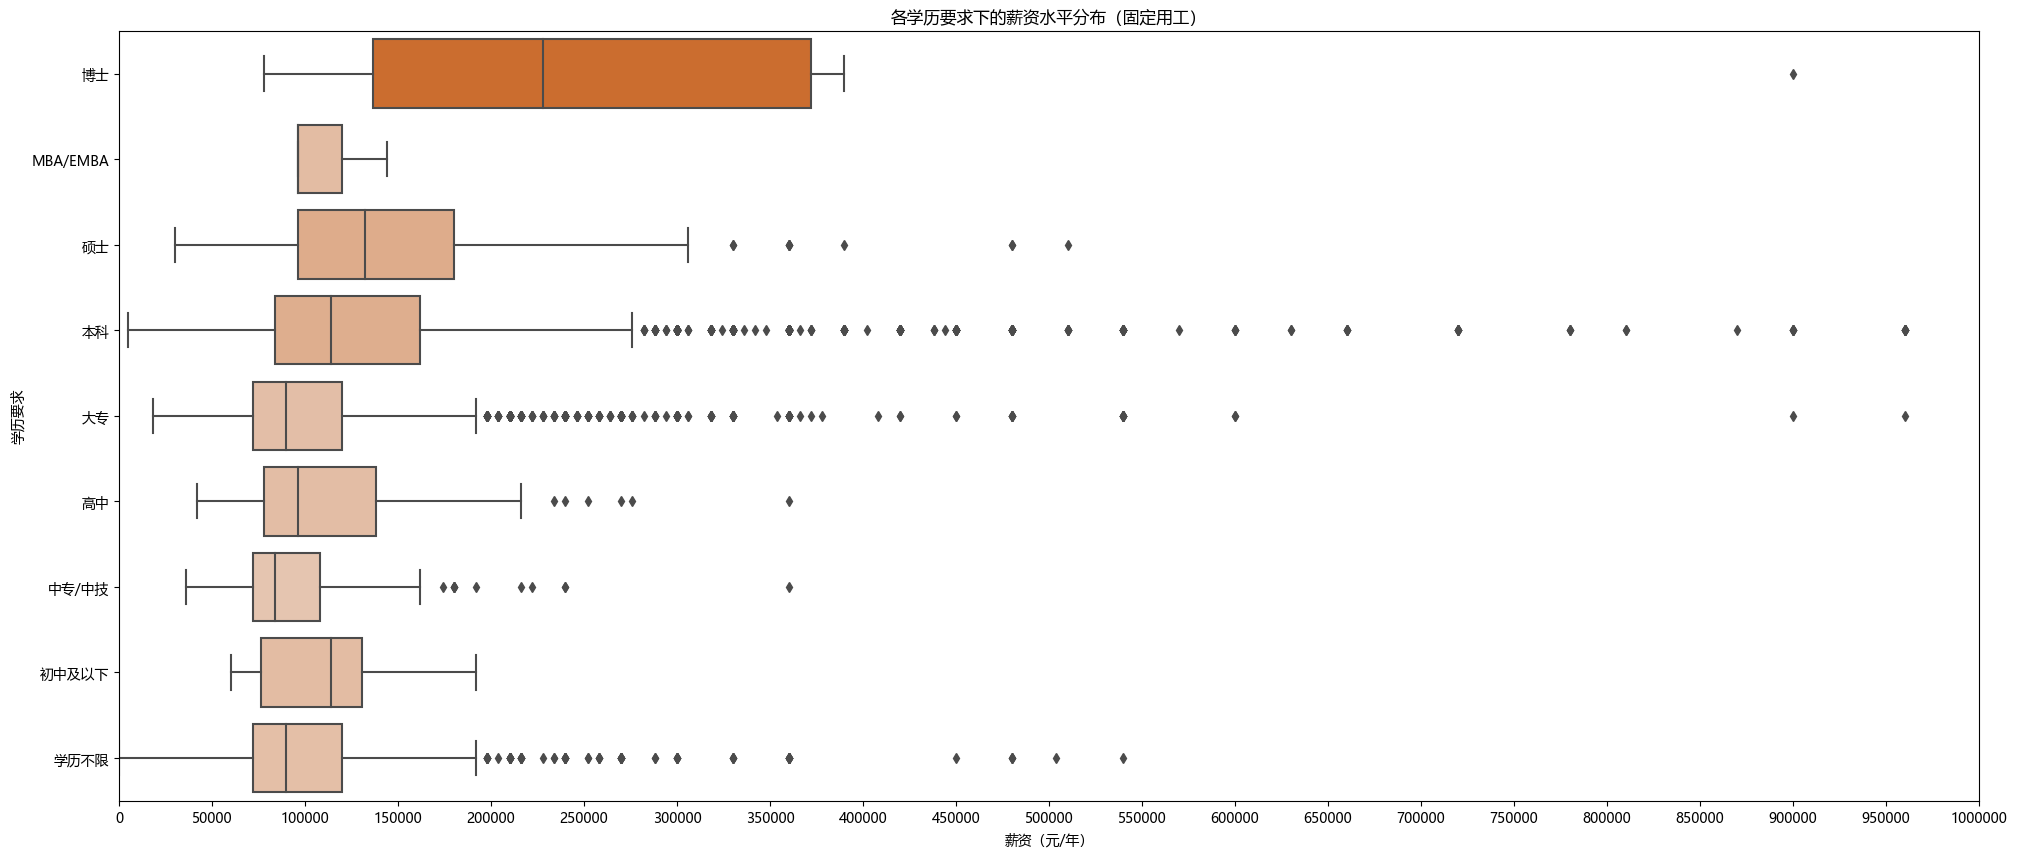

In [ ]:
# 固定用工
df_fixed = df[df['salary_type'] == 'M']

education_counts = df_fixed['学历'].value_counts().sort_values(ascending = False)

# 按照受教育水平高低排序
ordered_education_levels = [
    '博士', 'MBA/EMBA', '硕士', '本科', '大专', 
    '高中', '中专/中技', '初中及以下', '学历不限'
]
df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories = ordered_education_levels, ordered = True)

df_fixed['平均薪资'] = (df_fixed['salary_min'] + df_fixed['salary_max']) / 2
mean_salaries = df_fixed.groupby('学历')['平均薪资'].mean().reindex(ordered_education_levels)

# 绘制箱型图
cmap = sns.light_palette("#E56815", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() # 颜色深度代表均值大小

plt.figure(figsize = (24, 10))
sns.boxplot(y = '学历', x = '平均薪资', data = df_fixed, order = ordered_education_levels, palette = color_depth)
plt.ylabel("学历要求")
plt.xlabel("薪资（元/年）")
plt.title("各学历要求下的薪资水平分布（固定用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

edu_fixed_path = os.path.join("..\\img\\task2", "各学历要求下的薪资水平分布（固定用工）.png")
plt.savefig(edu_fixed_path, dpi = 300, bbox_inches='tight')

plt.show()

### 灵活用工

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\793351853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['学历'] = pd.Categorical(df_flex['学历'], categories = ordered_education_levels, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\793351853.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['平均薪资'] = (df_flex['salary_min'] + df_flex['salary_max']) / 2


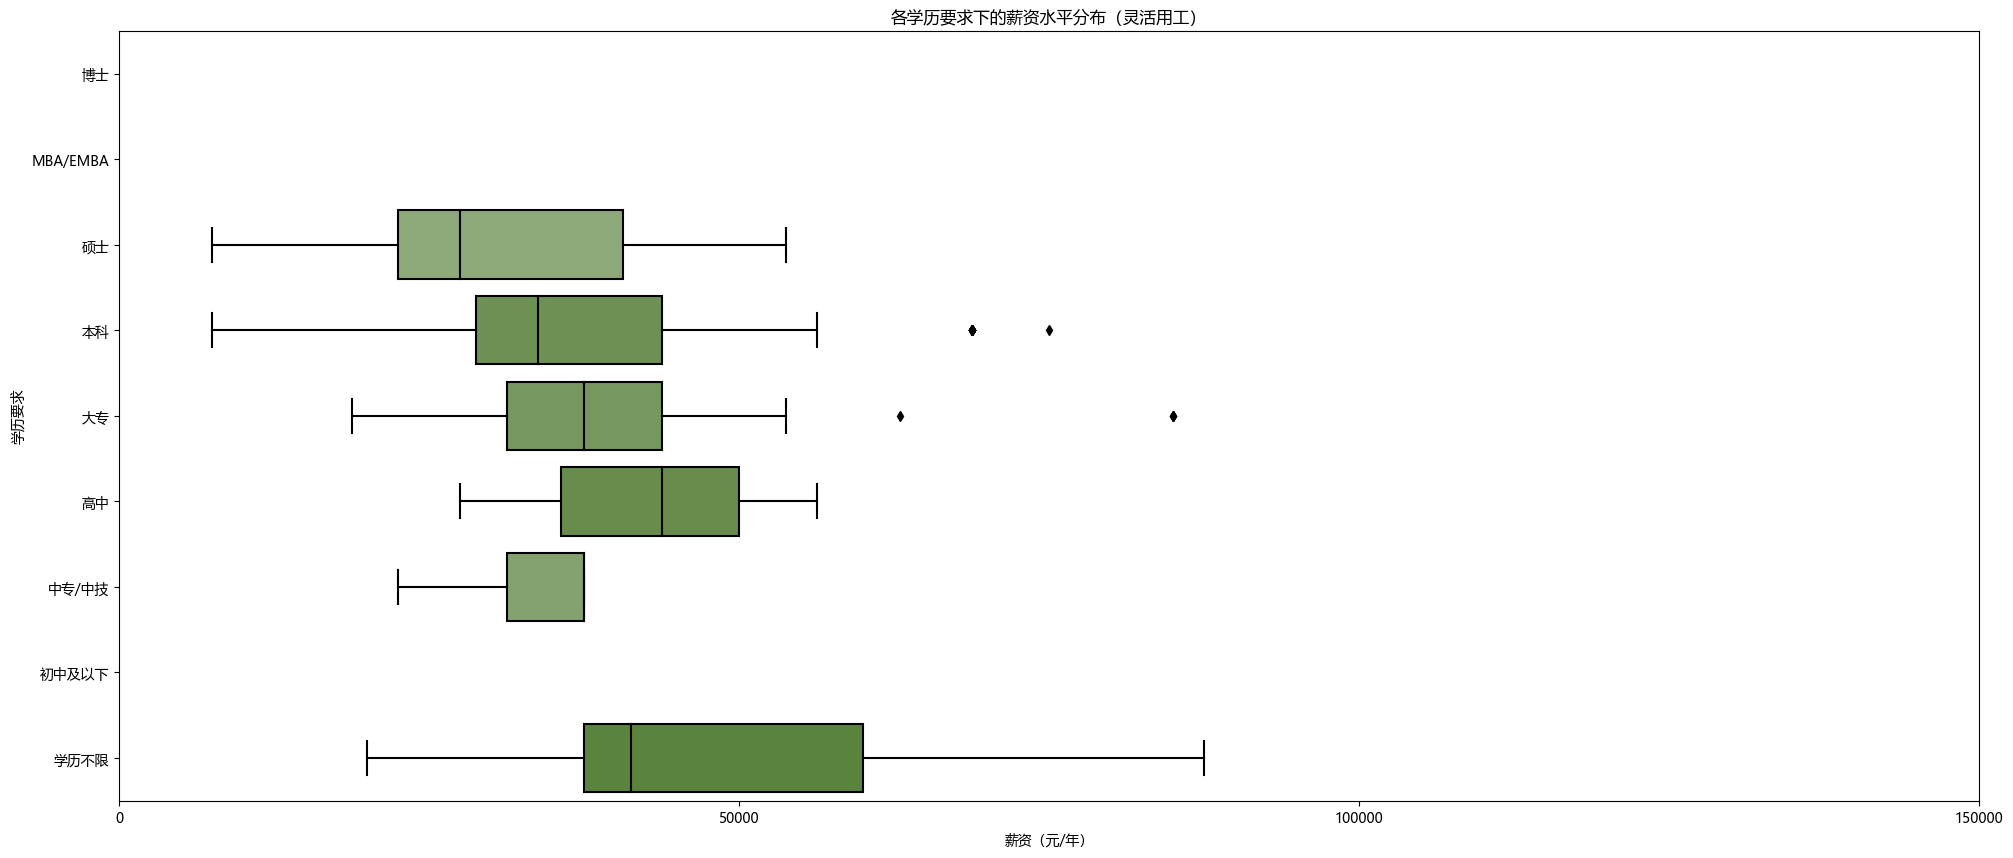

In [ ]:
# 灵活用工
df_flex = df[(df['salary_type'] == 'W')| (df['salary_type'] == 'D')| (df['salary_type'] == 'H')]

education_counts = df_flex['学历'].value_counts().sort_values(ascending=False)

# 按照受教育水平高低排序
ordered_education_levels = [
    '博士', 'MBA/EMBA', '硕士', '本科', '大专', 
    '高中', '中专/中技', '初中及以下', '学历不限'
]
df_flex['学历'] = pd.Categorical(df_flex['学历'], categories = ordered_education_levels, ordered = True)

df_flex['平均薪资'] = (df_flex['salary_min'] + df_flex['salary_max']) / 2
mean_salaries = df_flex.groupby('学历')['平均薪资'].mean().reindex(ordered_education_levels)

# 绘制箱型图
cmap = sns.light_palette("#588E32", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() # 颜色深度代表均值大小

plt.figure(figsize = (24, 10))
sns.boxplot(y = '学历', x = '平均薪资', data = df_flex, order = ordered_education_levels, palette = color_depth)
plt.ylabel("学历要求")
plt.xlabel("薪资（元/年）")
plt.title("各学历要求下的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

edu_flex_path = os.path.join("..\\img\\task2", "各学历要求下的薪资水平分布（灵活用工）.png")
plt.savefig(edu_flex_path, dpi = 300, bbox_inches='tight')

plt.show()

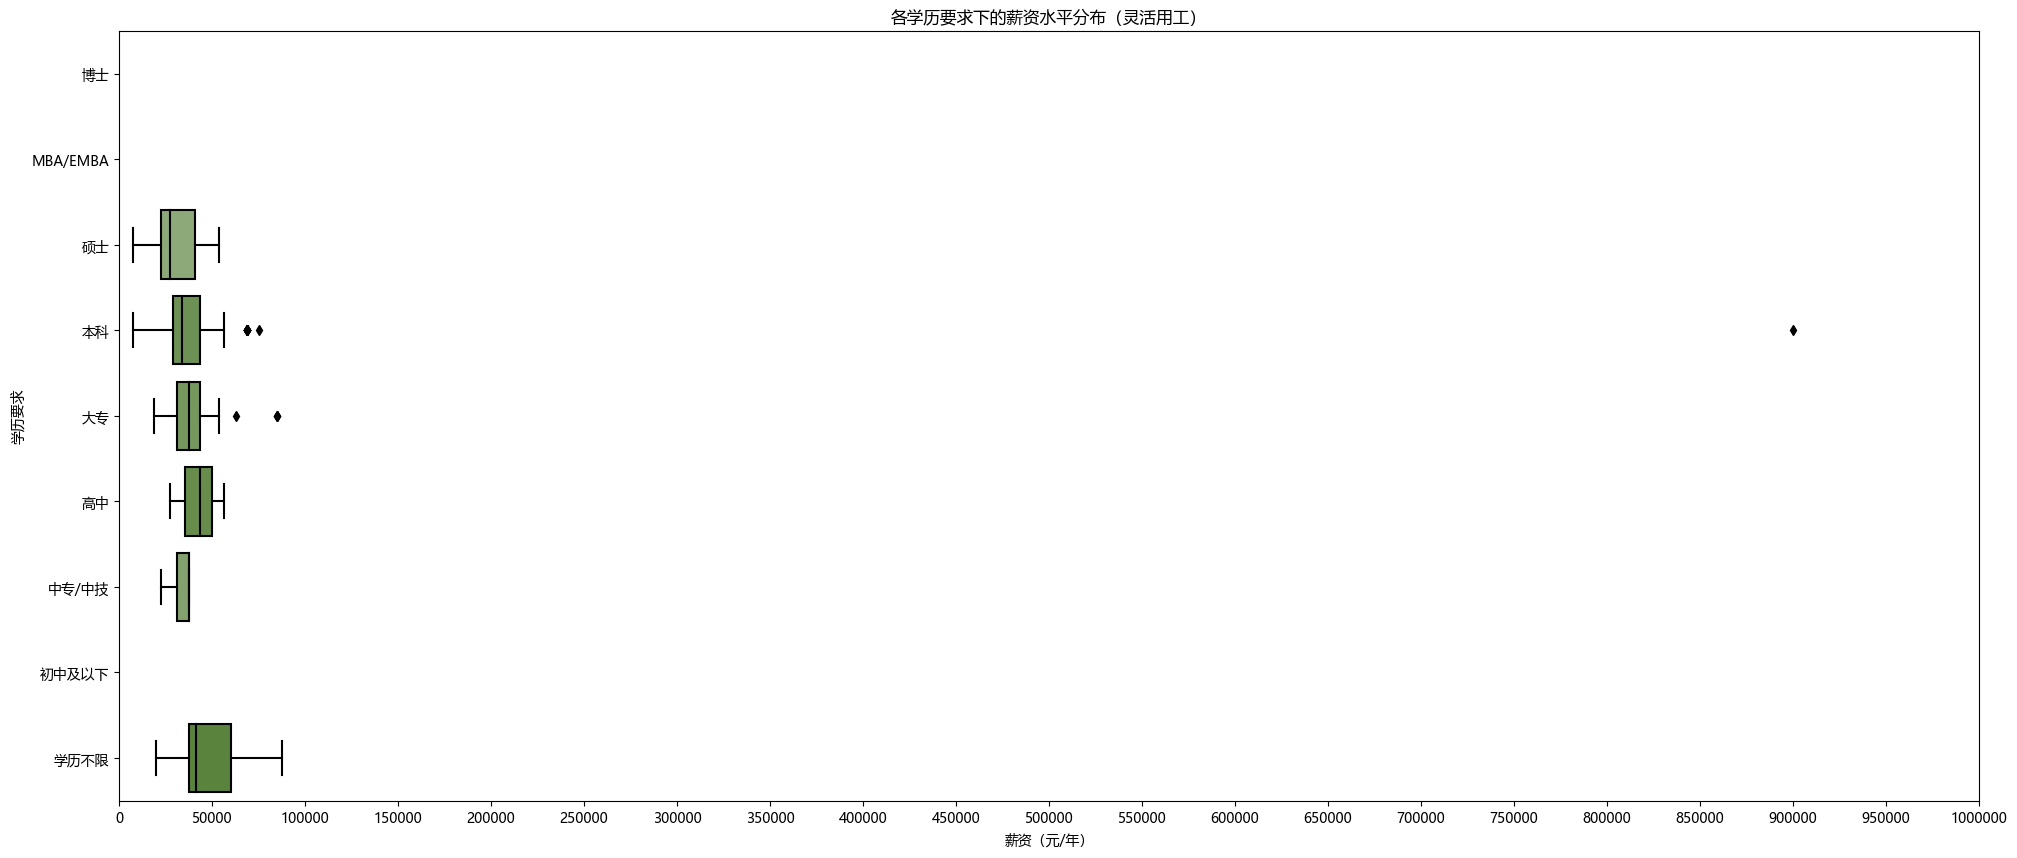

In [ ]:
# 统一x轴最大值
plt.figure(figsize = (24, 10))
sns.boxplot(y = '学历', x = '平均薪资', data = df_flex, order = ordered_education_levels, palette = color_depth)
plt.ylabel("学历要求")
plt.xlabel("薪资（元/年）")
plt.title("各学历要求下的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

edu_flex_path_2 = os.path.join("..\\img\\task2", "各学历要求下的薪资水平分布（灵活用工）_统一xmax.png")
plt.savefig(edu_flex_path_2, dpi = 300, bbox_inches='tight')

plt.show()

## 学历要求与薪资的回归分析

In [12]:
# 给离散值编码
ordered_education_levels = [
    '博士', 'MBA/EMBA', '硕士', '本科', '大专', 
    '高中', '中专/中技', '初中及以下', '学历不限'
]

### 固定用工

In [ ]:
# 固定用工，和所有相关招聘信息的平均薪资做回归分析
df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories = ordered_education_levels, ordered = True)
df_fixed['edu_code'] = df_fixed['学历'].cat.codes

X = df_fixed['edu_code'] 
y = df_fixed['平均薪资'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   平均薪资   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     372.6
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           3.25e-82
Time:                        09:24:57   Log-Likelihood:            -2.3522e+05
No. Observations:               18423   AIC:                         4.705e+05
Df Residuals:                   18421   BIC:                         4.705e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e+05   1728.959     88.293      0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3440452629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories=ordered_education_levels, ordered=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3440452629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['edu_code'] = df_fixed['学历'].cat.codes


1. 学历要求对固定用工的招聘平均薪资的影响具有统计显著性（$p < 0.05$），说明学历对招聘平均薪资存在显著影响力；
2. 但学历要求对固定用工的招聘平均薪资的解释力非常有限（$R^2 = 0.020$），即只能解释2\%的招聘平均薪资水平变动，说明**大部分的薪资变动可能由其他因素解释**。

In [34]:
# 固定用工，和学历整体平均薪资做回归分析
df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories = ordered_education_levels, ordered = True)
grouped_data_edu_fixed = df_fixed.groupby('学历')['平均薪资'].mean().reset_index()
grouped_data_edu_fixed['edu_code'] = grouped_data_edu_fixed['学历'].cat.codes

X = grouped_data_edu_fixed['edu_code'] 
y = grouped_data_edu_fixed['平均薪资'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   平均薪资   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5.709
Date:                Sat, 16 Nov 2024   Prob (F-statistic):             0.0482
Time:                        10:27:37   Log-Likelihood:                -108.19
No. Observations:                   9   AIC:                             220.4
Df Residuals:                       7   BIC:                             220.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.896e+05    2.8e+04      6.762      0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\1651119046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories = ordered_education_levels, ordered = True)
D:\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


$p < 0.05$，$R^2 = 0.449$

影响依旧显著，可解释性提升了很多，但依旧不强。

### 灵活用工

In [ ]:
# 灵活用工，和所有相关招聘信息的平均薪资做回归分析
df_flex['学历'] = pd.Categorical(df_flex['学历'], categories = ordered_education_levels, ordered = True)
df_flex['edu_code'] = df_flex['学历'].cat.codes

# 回归分析
X = df_flex['edu_code'] 
y = df_flex['平均薪资'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   平均薪资   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4934
Date:                Sat, 16 Nov 2024   Prob (F-statistic):              0.483
Time:                        09:46:34   Log-Likelihood:                -4386.7
No. Observations:                 360   AIC:                             8777.
Df Residuals:                     358   BIC:                             8785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.548e+04   6745.813      5.260      0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\598444197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['学历'] = pd.Categorical(df_flex['学历'], categories = ordered_education_levels, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\598444197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['edu_code'] = df_flex['学历'].cat.codes


$p > 0.05$，$R^2 = 0.001$：在灵活用工中，学历与薪资完全不相关

灵活用工中学历要求和所有相关招聘信息的平均薪资的回归分析略。

# 经验和薪资的关联分析

## 薪资要求在不同经验要求上的分布-箱型图

### 固定用工

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\2981764683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\2981764683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['平均薪资'] = (df_fixed['salary_min'] + df_fixed['salary_max']) / 2


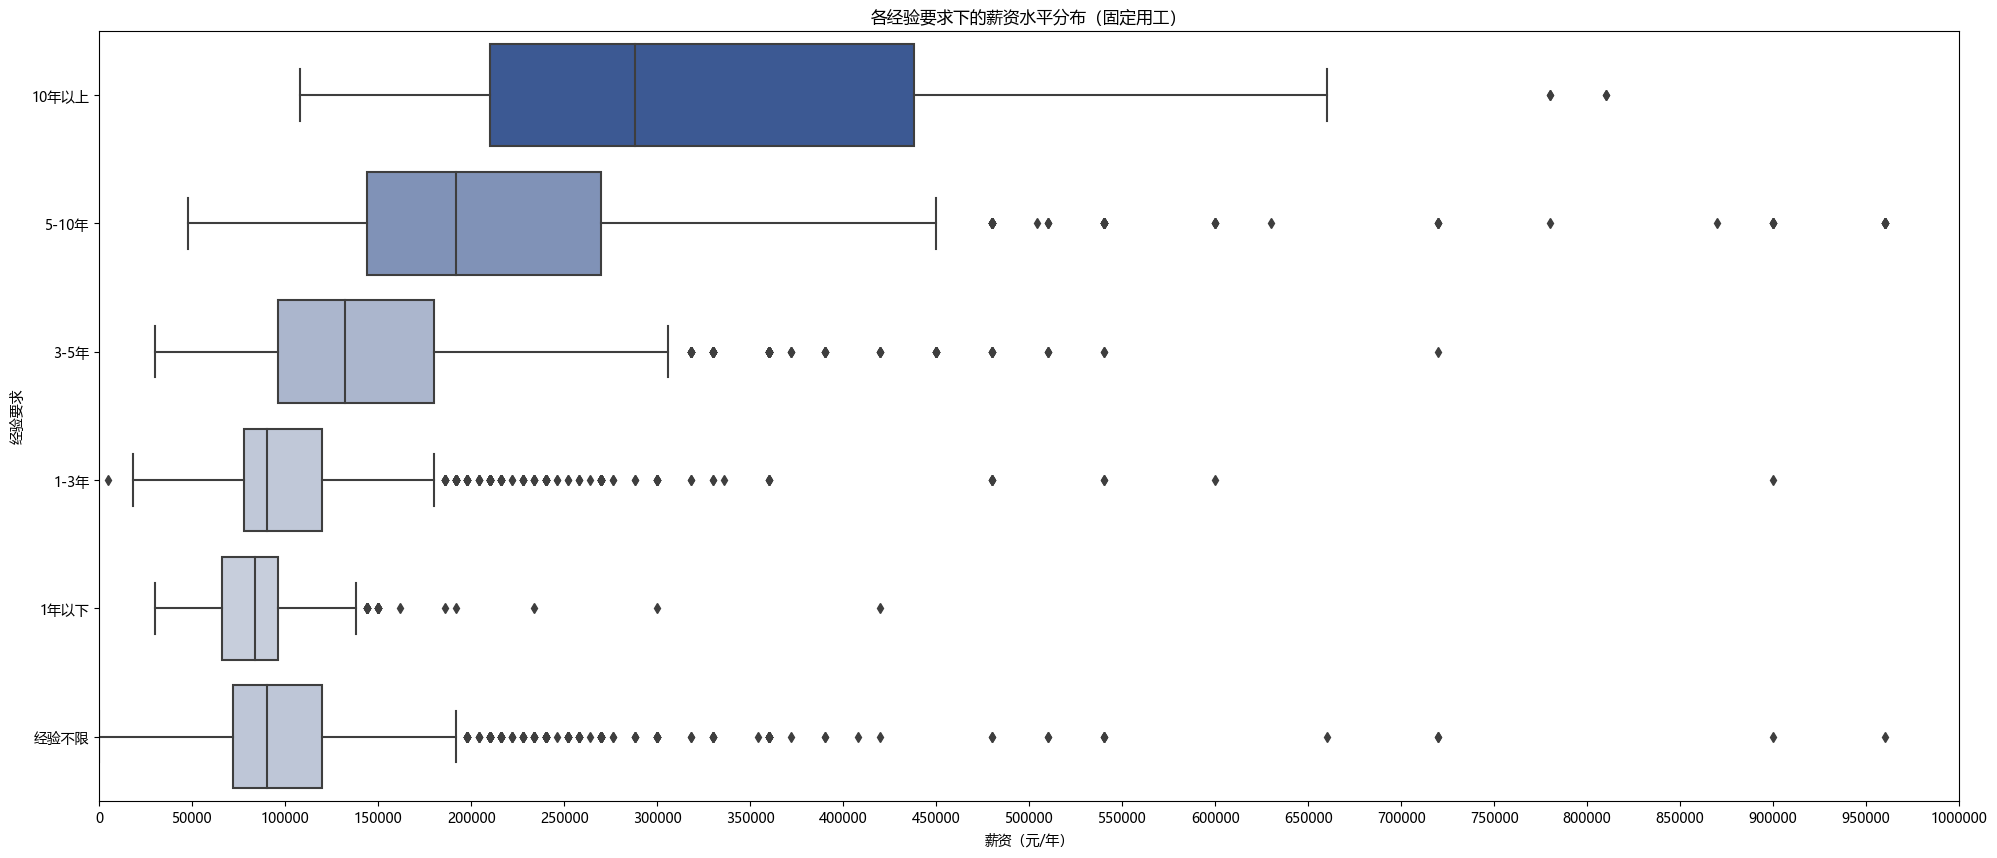

In [ ]:
# 固定用工
exp_fixed_counts = df_fixed['工作经验'].value_counts().sort_values(ascending = False)

# 按照受教育水平高低排序
ordered_exp_levels = [
    '10年以上', '5-10年', '3-5年', '1-3年','1年以下', '经验不限'
]
df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered = True)

df_fixed['平均薪资'] = (df_fixed['salary_min'] + df_fixed['salary_max']) / 2
mean_salaries = df_fixed.groupby('工作经验')['平均薪资'].mean().reindex(ordered_exp_levels)

# 绘制箱型图
cmap = sns.light_palette("#2E54A1", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() # 颜色深度代表均值大小

plt.figure(figsize = (24, 10))
sns.boxplot(y = '工作经验', x = '平均薪资', data = df_fixed, order = ordered_exp_levels, palette = color_depth)
plt.ylabel("经验要求")
plt.xlabel("薪资（元/年）")
plt.title("各经验要求下的薪资水平分布（固定用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

epx_path = os.path.join("..\\img\\task2", "各经验要求下的薪资水平分布（固定用工）.png")
plt.savefig(epx_path, dpi = 300, bbox_inches='tight')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\2530597612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['工作经验'] = pd.Categorical(df_flex['工作经验'], categories = ordered_exp_levels, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\2530597612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['平均薪资'] = (df_flex['salary_min'] + df_flex['salary_max']) / 2


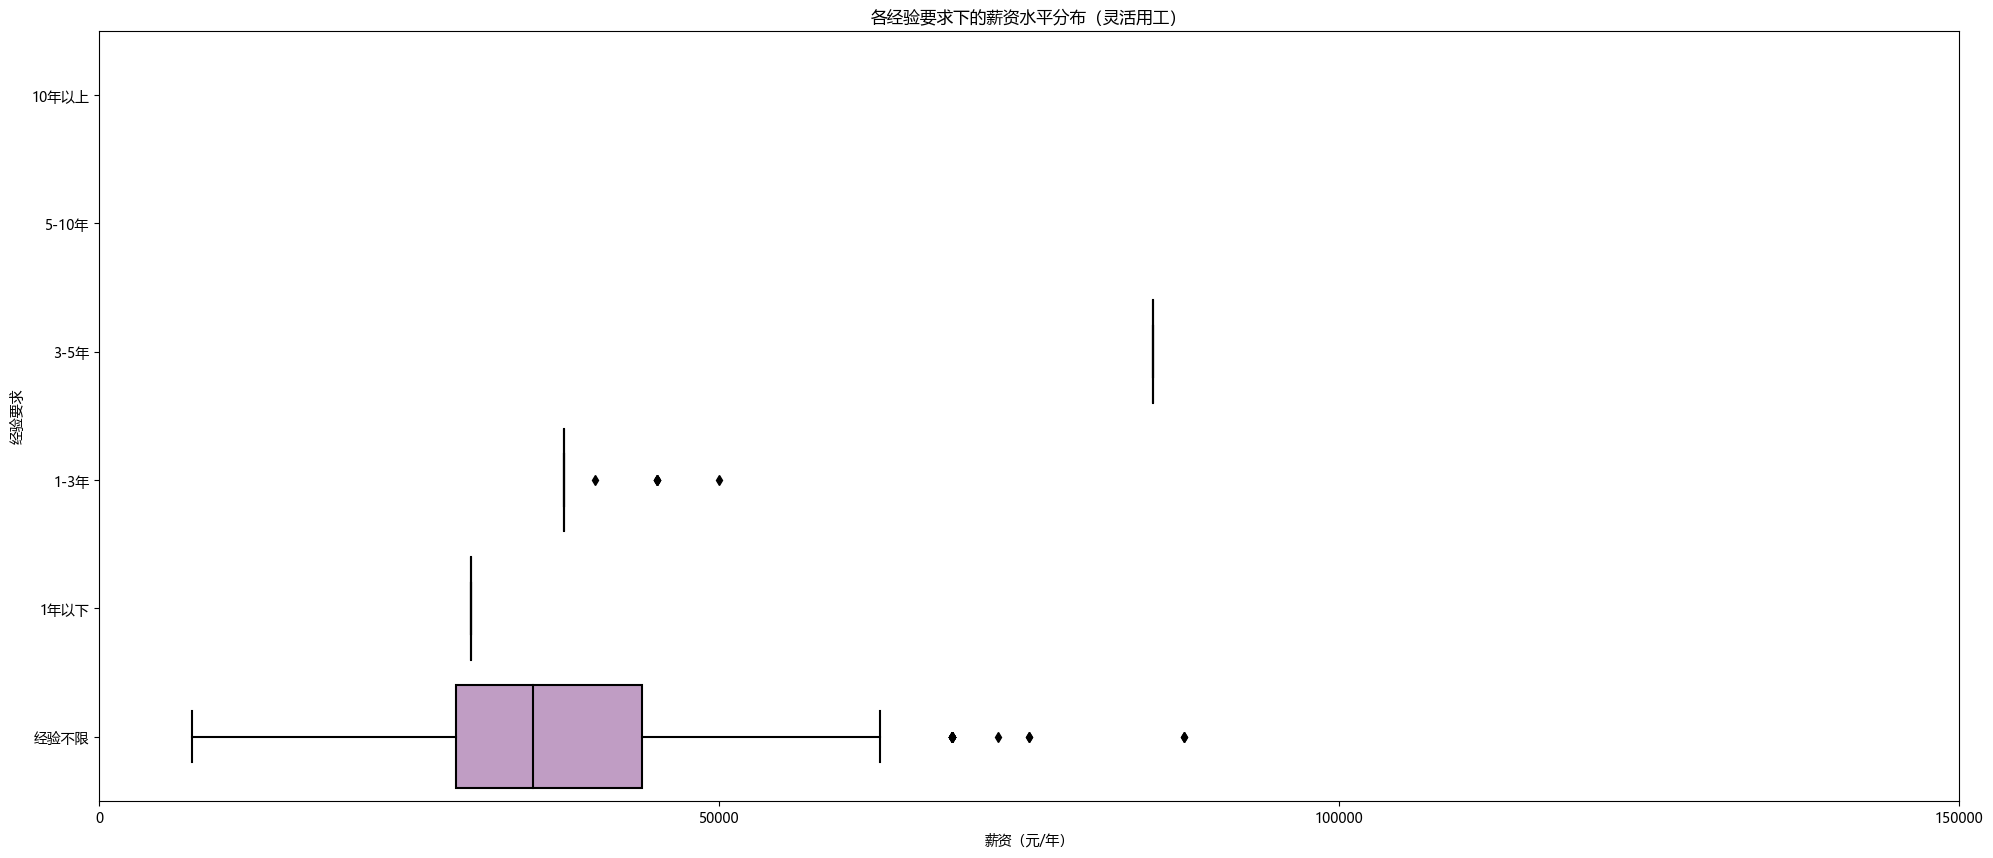

In [ ]:
# 灵活用工
exp_flex_counts = df_flex['工作经验'].value_counts().sort_values(ascending = False)

# 按照受教育水平高低排序
ordered_exp_levels = [
    '10年以上', '5-10年', '3-5年', '1-3年','1年以下', '经验不限'
]
df_flex['工作经验'] = pd.Categorical(df_flex['工作经验'], categories = ordered_exp_levels, ordered = True)

df_flex['平均薪资'] = (df_flex['salary_min'] + df_flex['salary_max']) / 2
mean_salaries = df_flex.groupby('工作经验')['平均薪资'].mean().reindex(ordered_exp_levels)

# 绘制箱型图
cmap = sns.light_palette("#92319D", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() # 颜色深度代表均值大小

plt.figure(figsize = (24, 10))
sns.boxplot(y = '工作经验', x = '平均薪资', data = df_flex, order = ordered_exp_levels, palette = color_depth)
plt.ylabel("经验要求")
plt.xlabel("薪资（元/年）")
plt.title("各经验要求下的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

epx_path = os.path.join("..\\img\\task2", "各经验要求下的薪资水平分布（灵活用工）.png")
plt.savefig(epx_path, dpi = 300, bbox_inches='tight')


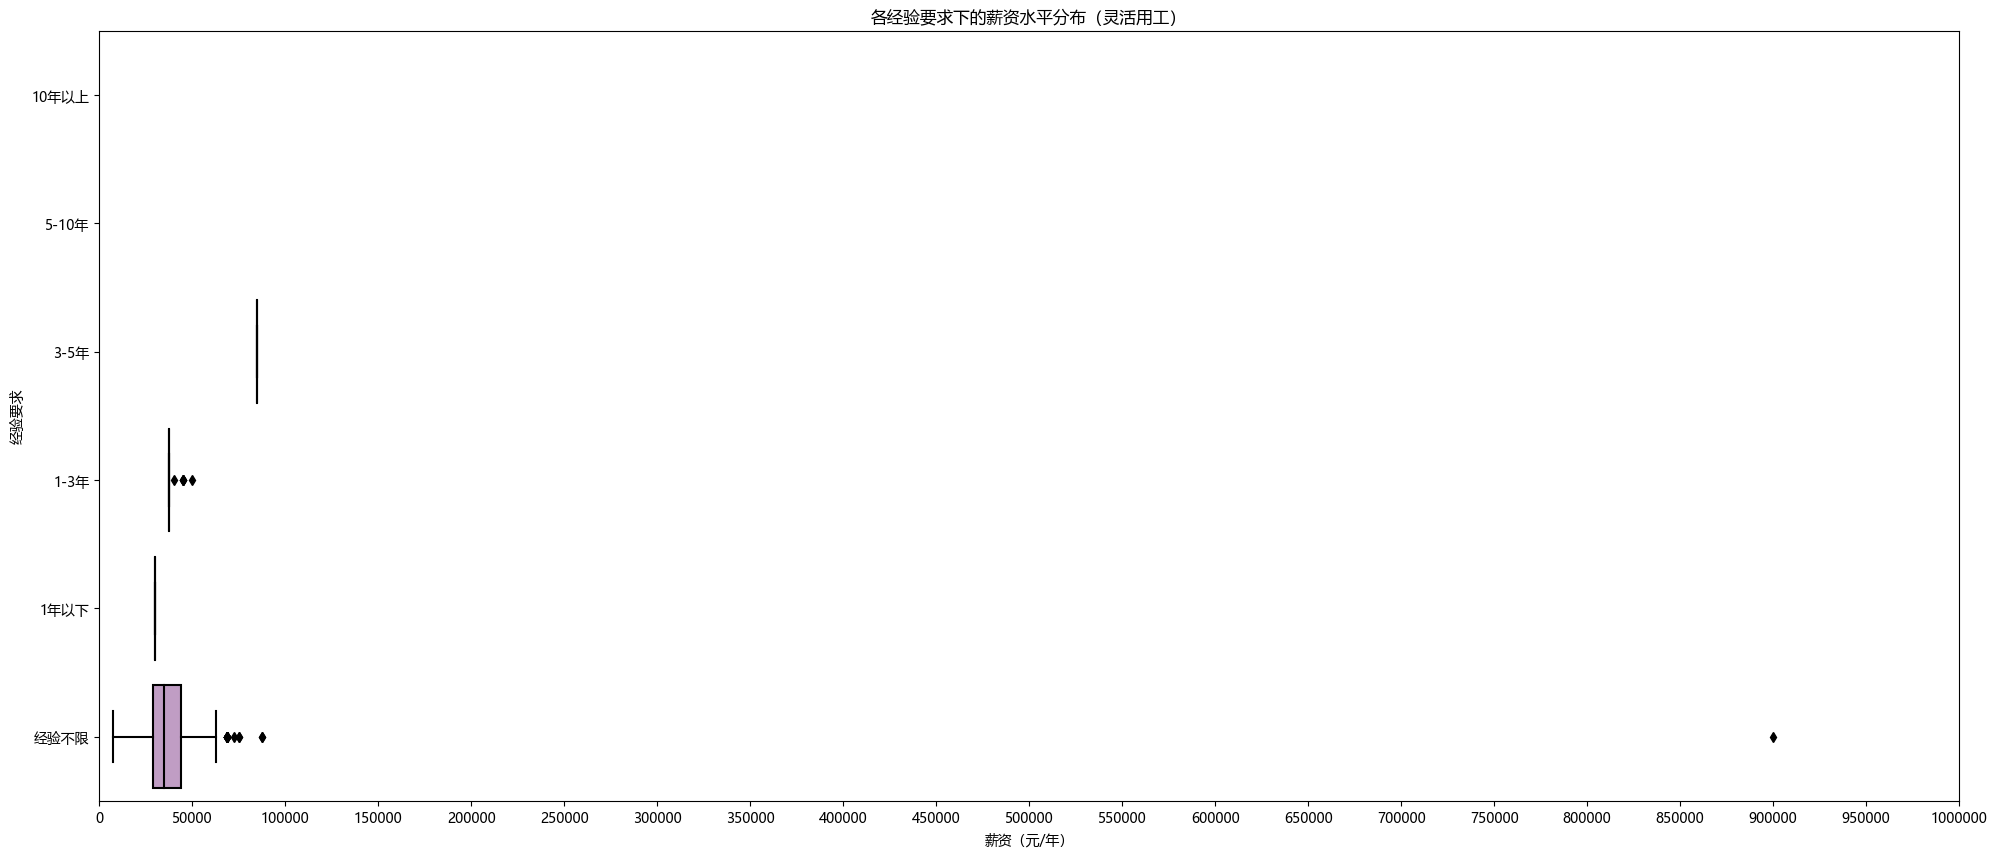

In [ ]:
# 统一x轴范围
plt.figure(figsize = (24, 10))
sns.boxplot(y = '工作经验', x = '平均薪资', data = df_flex, order = ordered_exp_levels, palette = color_depth)
plt.ylabel("经验要求")
plt.xlabel("薪资（元/年）")
plt.title("各经验要求下的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

epx_path = os.path.join("..\\img\\task2", "各经验要求下的薪资水平分布（灵活用工）_统一xmax.png")
plt.savefig(epx_path, dpi = 300, bbox_inches='tight')

## 经验要求与薪资水平的回归分析

### 固定用工

In [30]:
# 和各招聘信息的平均薪资
df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered = True)
df_fixed['exp_code'] = df_fixed['工作经验'].cat.codes

X = df_fixed['exp_code'] 
y = df_fixed['平均薪资'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   平均薪资   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2225.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:17:01   Log-Likelihood:            -2.3436e+05
No. Observations:               18423   AIC:                         4.687e+05
Df Residuals:                   18421   BIC:                         4.687e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.922e+05   1611.579    119.233      0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3656432997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3656432997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['exp_code'] = df_fixed['工作经验'].cat.codes


1. 经验要求对固定用工的招聘平均薪资的影响具有统计显著性（$p < 0.05$），说明经验对招聘平均薪资存在显著影响力；
2. 但经验要求对固定用工的招聘平均薪资的解释力有限（$R^2 = 0.108$），即只能解释10.8\%的招聘平均薪资水平变动，说明**大部分的薪资变动可能由其他因素解释**。

In [33]:
# 和各经验要求对应的整体平均薪资
df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered = True)
grouped_data_exp_fixed = df_fixed.groupby('工作经验')['平均薪资'].mean().reset_index()
grouped_data_exp_fixed['exp_code'] = grouped_data_exp_fixed['工作经验'].cat.codes

X = grouped_data_exp_fixed['exp_code'] 
y = grouped_data_exp_fixed['平均薪资'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   平均薪资   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     13.61
Date:                Sat, 16 Nov 2024   Prob (F-statistic):             0.0210
Time:                        10:26:52   Log-Likelihood:                -73.230
No. Observations:                   6   AIC:                             150.5
Df Residuals:                       4   BIC:                             150.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.044e+05   4.28e+04      7.104      0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3186640698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered = True)
D:\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


- 学历与薪资之间存在显著的正相关关系：**工作经验要求越高，整体平均薪资越高**。
- 模型的解释力较强：$R^2 = 0.773$表明**工作经验是薪资的重要影响因素**，但可能还存在其他未纳入的变量（如经验、行业等）。
- 回归系数和显著性检验：经验要求对固定用工的平均薪资的影响具有统计显著性（$p < 0.05$），说明经验对招聘平均薪资存在显著影响力。

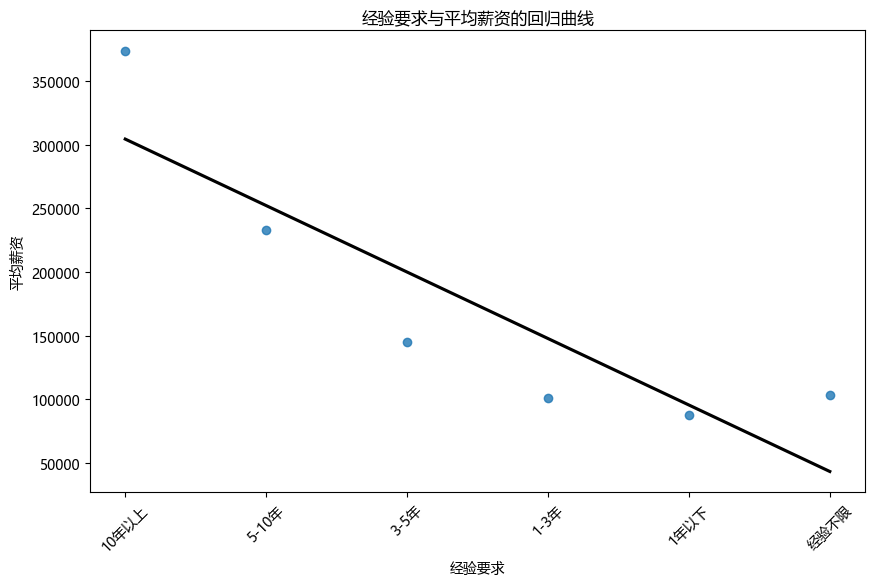

In [ ]:
# 绘制经验要求与平均薪资的回归曲线
plt.figure(figsize = (10, 6))
sns.regplot(x = 'exp_code', y = '平均薪资', data = grouped_data_exp_fixed, ci = None, line_kws = {"color": "black"})
plt.xticks(ticks = range(len(ordered_exp_levels)), labels = ordered_exp_levels, rotation=45)
plt.xlabel("经验要求")
plt.ylabel("平均薪资")
plt.title("经验要求与平均薪资的回归曲线")

regression_path = os.path.join("..\\img\\task2", "经验要求与平均薪资的回归曲线.png")
plt.savefig(regression_path, dpi = 300, bbox_inches='tight')

### 灵活用工

In [32]:
# 和各招聘信息的平均薪资
df_flex['工作经验'] = pd.Categorical(df_flex['工作经验'], categories = ordered_exp_levels, ordered = True)
df_flex['exp_code'] = df_flex['工作经验'].cat.codes

X = df_flex['exp_code'] 
y = df_flex['平均薪资'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   平均薪资   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4540
Date:                Sat, 16 Nov 2024   Prob (F-statistic):              0.501
Time:                        10:23:34   Log-Likelihood:                -4386.7
No. Observations:                 360   AIC:                             8777.
Df Residuals:                     358   BIC:                             8785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.372e+04   2.07e+04      2.597      0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3285723433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['工作经验'] = pd.Categorical(df_flex['工作经验'], categories = ordered_exp_levels, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3285723433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flex['exp_code'] = df_flex['工作经验'].cat.codes


$p > 0.05$，$R^2 = 0.001$：在灵活用工中，经验与薪资完全不相关

灵活用工中经验要求和所有相关招聘信息的平均薪资的回归分析略。

# 结合学历要求和经验要对招聘平均薪资做多元线性回归
发现在固定用工中，学历要求和经验要求对每条招聘信息的平均薪资都存在显著影响，但解释力都很低。故考虑结合学历要求和经验要求两个元素对薪资做回归分析

In [37]:
df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories = ordered_education_levels, ordered=True)
df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered=True)

df_fixed['edu_code'] = df_fixed['学历'].cat.codes
df_fixed['exp_code'] = df_fixed['工作经验'].cat.codes

X = df_fixed[['edu_code', 'exp_code']] 
y = df_fixed['平均薪资'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   平均薪资   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1137.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:35:58   Log-Likelihood:            -2.3434e+05
No. Observations:               18423   AIC:                         4.687e+05
Df Residuals:                   18420   BIC:                         4.687e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.998e+05   1976.136    101.084      0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\37454265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['学历'] = pd.Categorical(df_fixed['学历'], categories = ordered_education_levels, ordered=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\37454265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fixed['工作经验'] = pd.Categorical(df_fixed['工作经验'], categories = ordered_exp_levels, ordered=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\37454265.py:4: SettingWithCopyWarning

模型的解释力不算高（$R^2 = 0.110$），说明学历和经验虽然对薪资有显著影响（$p < 0.05$），但还有其他因素（也许是行业、职位类型等）对薪资有重要作用。

# 企业和薪资的交叉分析

## 企业类型

In [39]:
comp_types = df['企业财产类型'].unique()
print(comp_types)

['民营' '其它' '股份制企业' '上市公司' '国企' '外商独资' nan '社会团体' '合资' '事业单位' '医院' '律师事务所'
 '港澳台公司' '学校/下级学院' '银行' '代表处']


In [64]:
df_types_without_nan = df.dropna(subset = ['企业财产类型'])

comp_types_without_nan = df_types_without_nan['企业财产类型'].unique()
print(comp_types_without_nan)

['民营' '其它' '股份制企业' '上市公司' '国企' '外商独资' '社会团体' '合资' '事业单位' '医院' '律师事务所'
 '港澳台公司' '学校/下级学院' '银行' '代表处']


### 固定用工

In [51]:
df_comp_fixed = df_types_without_nan[df_types_without_nan['salary_type'] == 'M']

comp_order_fixed = df_comp_fixed['企业财产类型'].value_counts().index # 按照企业类型所包含招聘信息数量从多到少排序

df_comp_fixed['企业财产类型'] = pd.Categorical(df_comp_fixed['企业财产类型'], categories = comp_order_fixed, ordered = True)
df_comp_fixed['平均薪资'] = (df_comp_fixed['salary_min'] + df_comp_fixed['salary_max']) / 2
mean_salaries = df_comp_fixed.groupby('企业财产类型')['平均薪资'].mean().reindex(comp_order_fixed)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\1825778613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_fixed['企业财产类型'] = pd.Categorical(df_comp_fixed['企业财产类型'], categories = comp_order_fixed, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\1825778613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_fixed['平均薪资'] = (df_comp_fixed['salary_min'] + df_comp_fixed['salary_max']) / 2


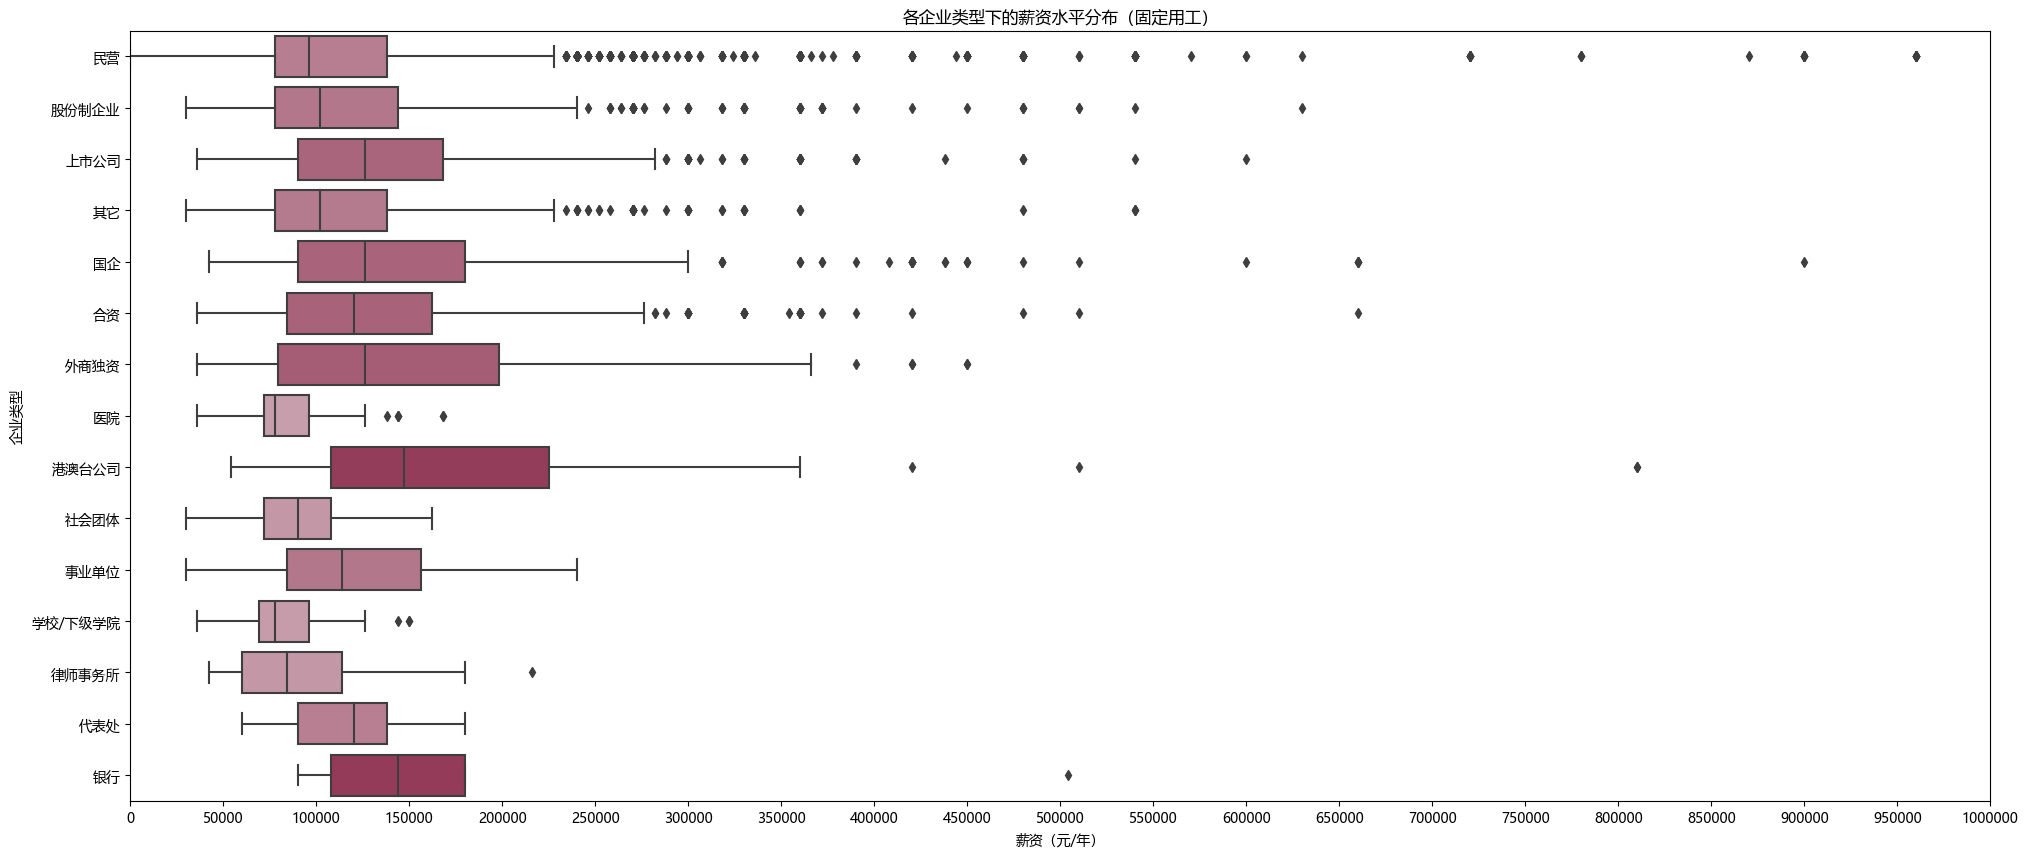

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#A22C53", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业财产类型', x = '平均薪资', data = df_comp_fixed, order = comp_order_fixed, palette = color_depth)
plt.ylabel("企业类型")
plt.xlabel("薪资（元/年）")
plt.title("各企业类型下的薪资水平分布（固定用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_fixed_path = os.path.join("..\\img\\task2", "各企业类型下的薪资水平分布（固定用工）.png")
plt.savefig(comp_fixed_path, dpi = 300, bbox_inches='tight')

### 灵活用工

In [54]:
df_comp_flex = df_types_without_nan[
    (df_types_without_nan['salary_type'] == 'W') | (df_types_without_nan['salary_type'] == 'D') | (df_types_without_nan['salary_type'] == 'H')
    ]

comp_order_flex = df_comp_flex['企业财产类型'].value_counts().index # 按照企业类型所包含招聘信息数量从多到少排序

df_comp_flex['企业财产类型'] = pd.Categorical(df_comp_flex['企业财产类型'], categories = comp_order_flex, ordered = True)
df_comp_flex['平均薪资'] = (df_comp_flex['salary_min'] + df_comp_flex['salary_max']) / 2
mean_salaries = df_comp_flex.groupby('企业财产类型')['平均薪资'].mean().reindex(comp_order_flex)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\516704382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_flex['企业财产类型'] = pd.Categorical(df_comp_flex['企业财产类型'], categories = comp_order_flex, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\516704382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_flex['平均薪资'] = (df_comp_flex['salary_min'] + df_comp_flex['salary_max']) / 2


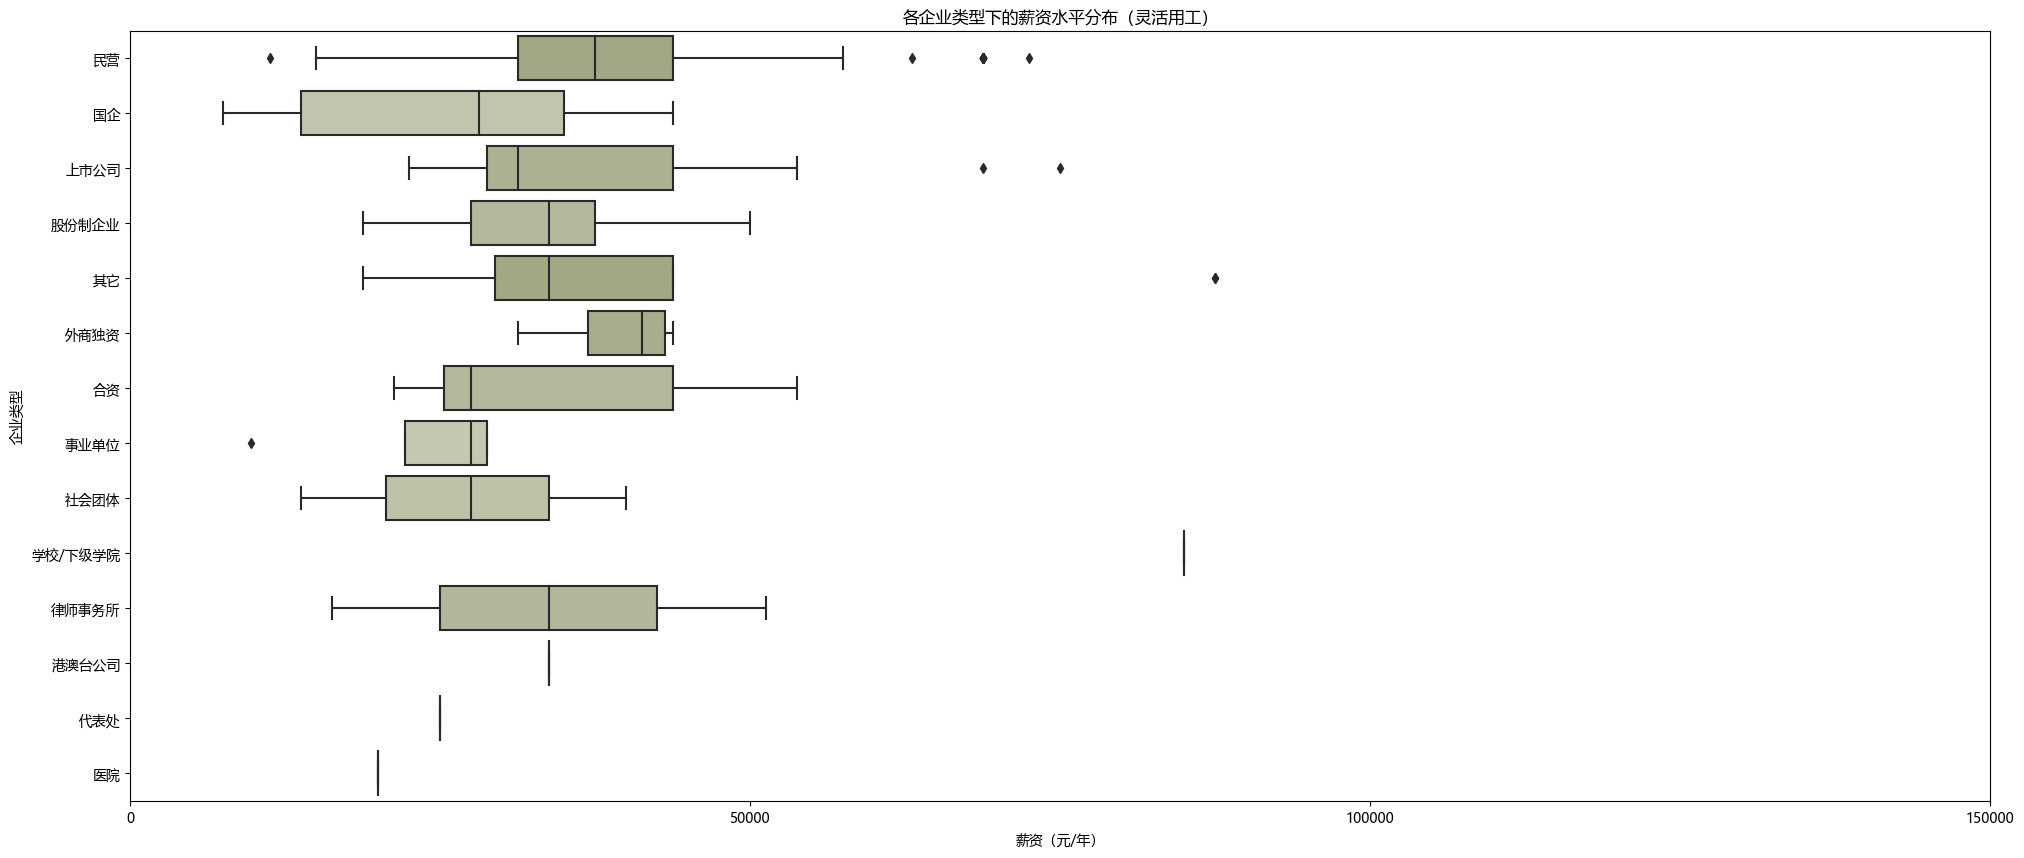

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#5A6921", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业财产类型', x = '平均薪资', data = df_comp_flex, order = comp_order_flex, palette = color_depth)
plt.ylabel("企业类型")
plt.xlabel("薪资（元/年）")
plt.title("各企业类型下的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_flex_path = os.path.join("..\\img\\task2", "各企业类型下的薪资水平分布（灵活用工）.png")
plt.savefig(comp_flex_path, dpi = 300, bbox_inches='tight')

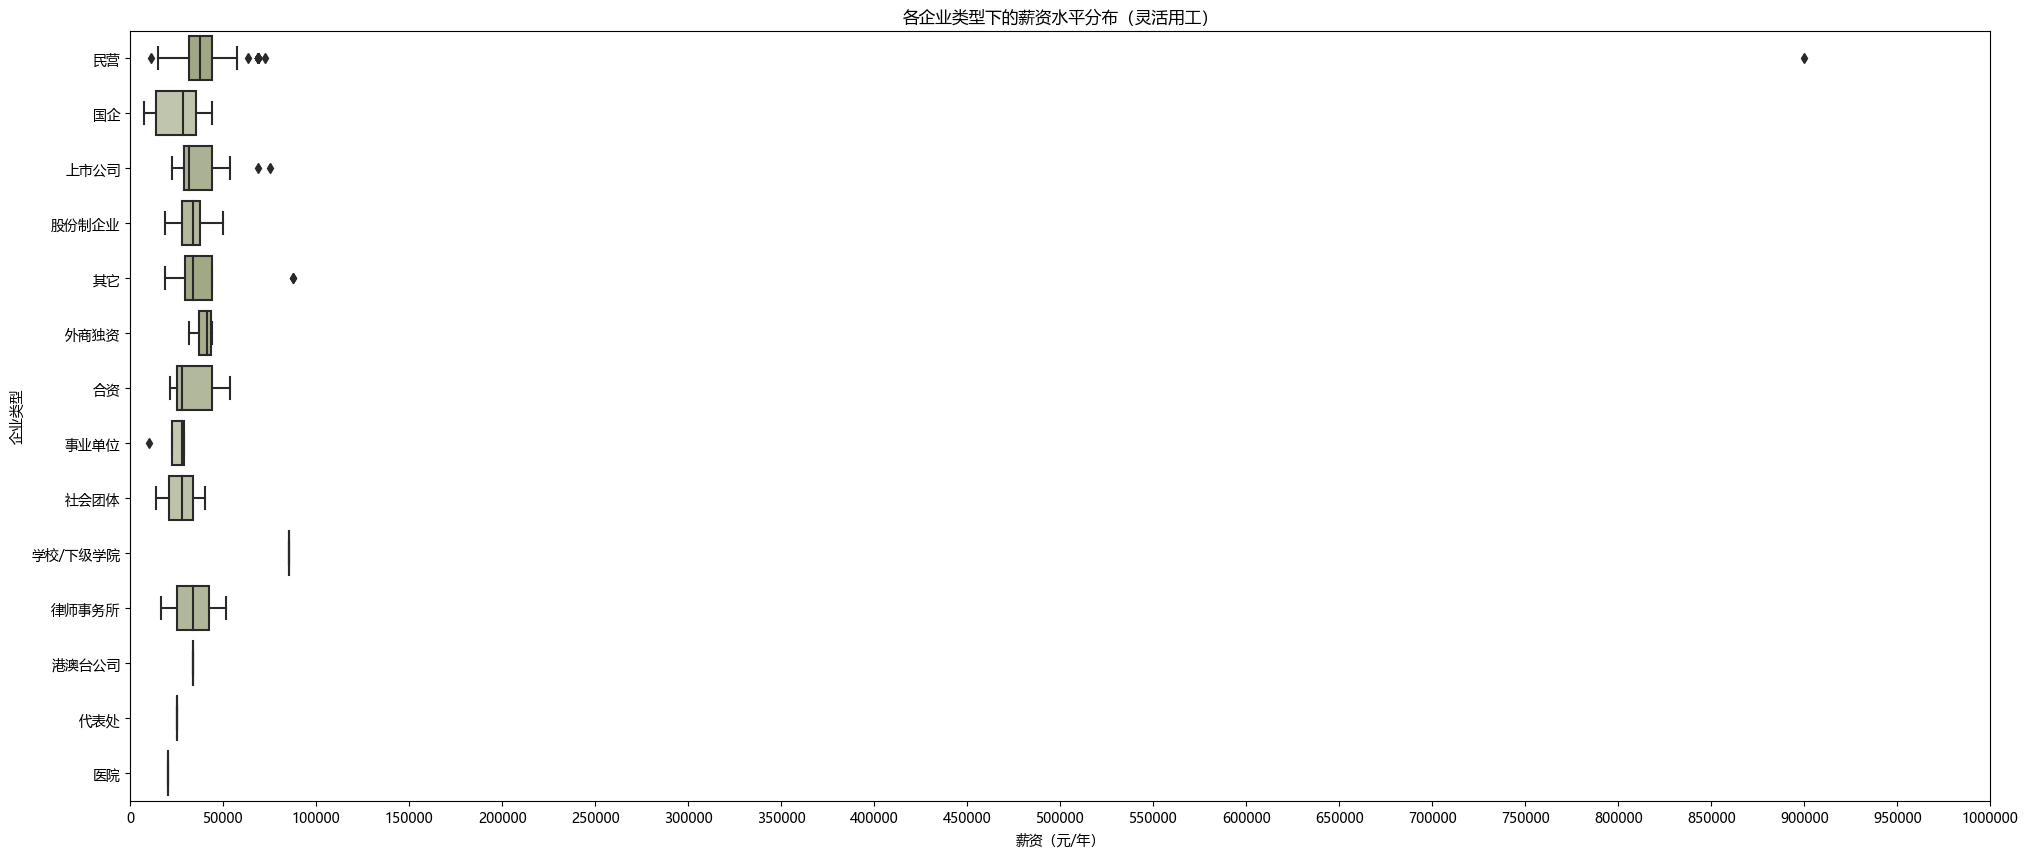

In [ ]:
# 统一x轴范围
plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业财产类型', x = '平均薪资', data = df_comp_flex, order = comp_order_flex, palette = color_depth)
plt.ylabel("企业类型")
plt.xlabel("薪资（元/年）")
plt.title("各企业类型下的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_flex_path_xmax = os.path.join("..\\img\\task2", "各企业类型下的薪资水平分布（灵活用工）_统一xmax.png")
plt.savefig(comp_flex_path_xmax, dpi = 300, bbox_inches='tight')

## 企业名称

In [67]:
df_names_without_nan = df.dropna(subset = ['企业名称'])

comp_names_without_nan = df_names_without_nan['企业名称'].unique()
print(comp_names_without_nan)

['北京市美顺雅鞋业有限责任公司' '克拉斯国际家居' '北京绿伞科技股份有限公司' ... '四川锘斯自动化设备有限公司'
 '北京优高雅装饰工程有限公司' '成都卓越四方环境科技有限公司']


### 固定用工

In [74]:
df_comp_name_fixed = df_names_without_nan[df_names_without_nan['salary_type'] == 'M']

#### 展示招聘信息数量排名前25的企业

In [78]:
comp_name_count_order_fixed = df_comp_name_fixed['企业名称'].value_counts().index[: 25] # 此处只取排序前25的做展示

df_comp_name_fixed['企业名称'] = pd.Categorical(df_comp_name_fixed['企业名称'], categories = comp_name_count_order_fixed, ordered = True)
df_comp_name_fixed['平均薪资'] = (df_comp_name_fixed['salary_min'] + df_comp_name_fixed['salary_max']) / 2
mean_salaries = df_comp_name_fixed.groupby('企业名称')['平均薪资'].mean().reindex(comp_name_count_order_fixed)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\1239190251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_name_fixed['企业名称'] = pd.Categorical(df_comp_name_fixed['企业名称'], categories = comp_name_count_order_fixed, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\1239190251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_name_fixed['平均薪资'] = (df_comp_name_fixed['salary_min'] + df_comp_name_fixed['salary_max']) / 2


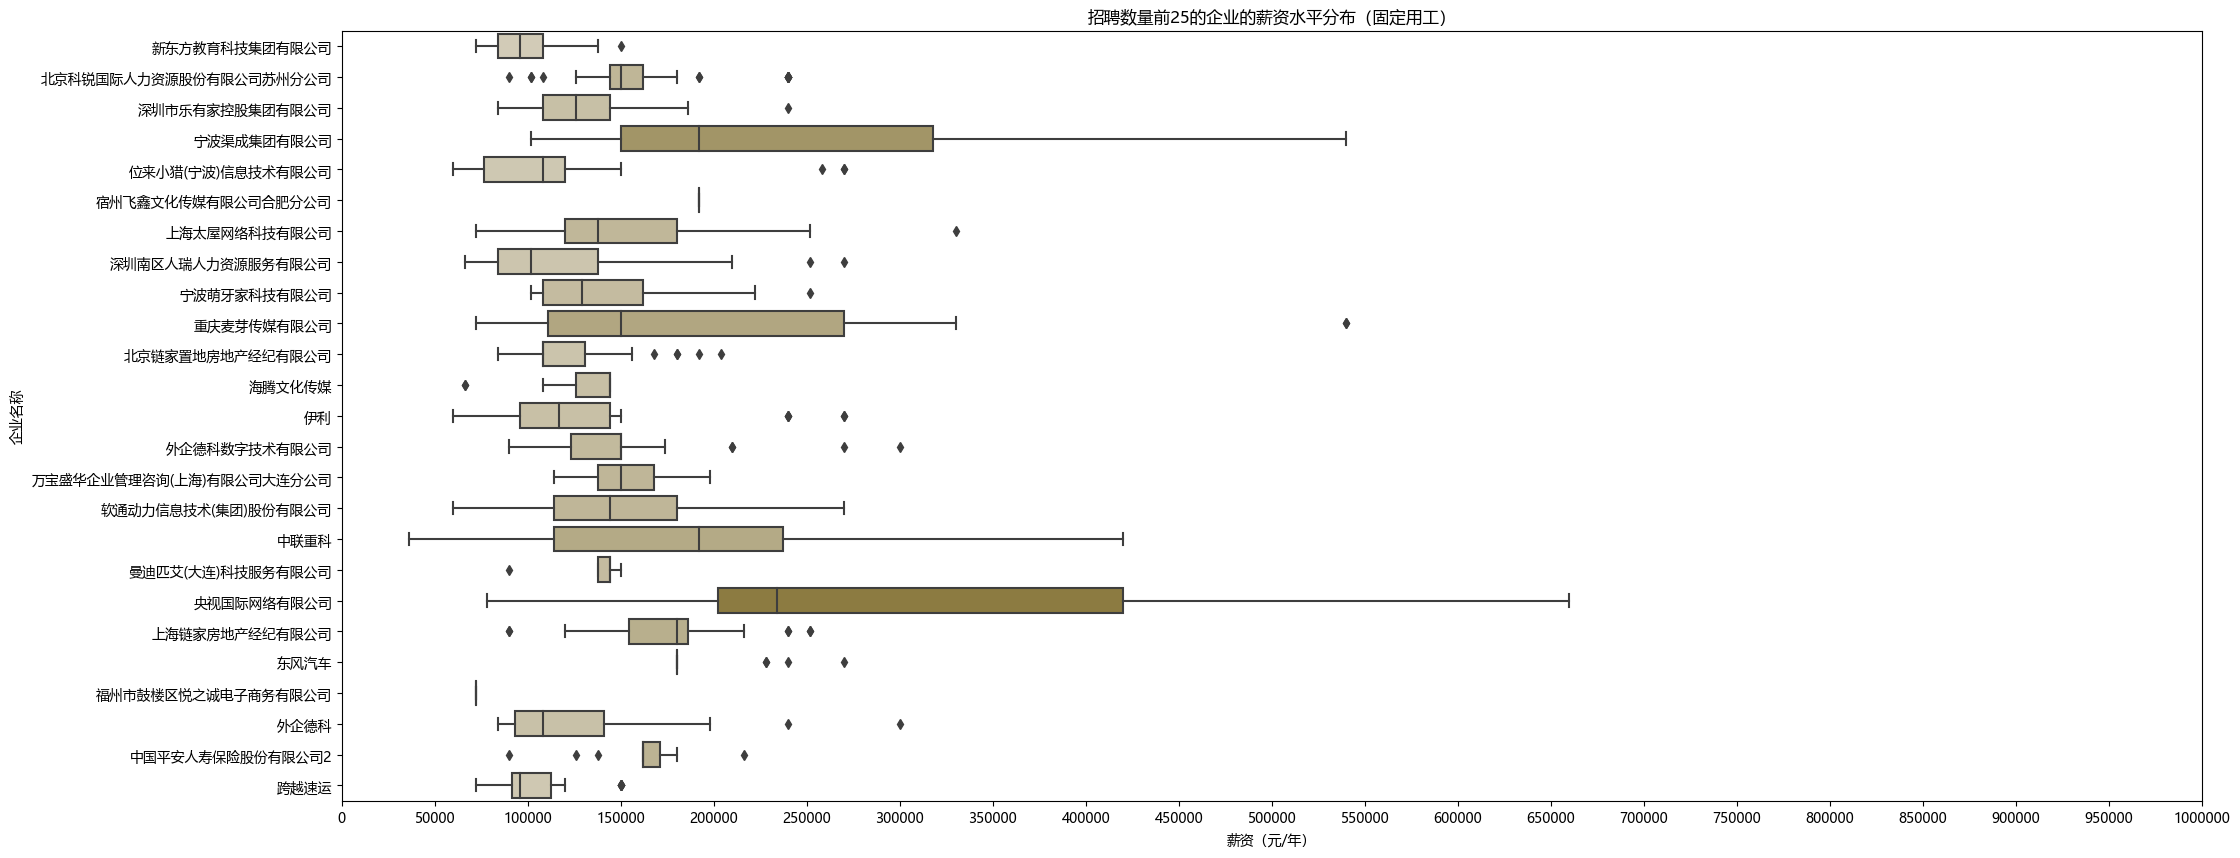

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#988235", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业名称', x = '平均薪资', data = df_comp_name_fixed, order = comp_name_count_order_fixed, palette = color_depth)
plt.ylabel("企业名称")
plt.xlabel("薪资（元/年）")
plt.title("招聘数量前25的企业的薪资水平分布（固定用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_name_fixed_top25counts_path = os.path.join("..\\img\\task2", "招聘数量前25的企业的薪资水平分布（固定用工）.png")
plt.savefig(comp_name_fixed_top25counts_path, dpi = 300, bbox_inches='tight')

#### 展示平均薪资水平排名前25的企业

In [80]:
comp_name_salary_order_fixed = mean_salaries.sort_values(ascending=False).index[:25]

df_comp_name_fixed['企业名称'] = pd.Categorical(df_comp_name_fixed['企业名称'], categories=comp_name_salary_order_fixed, ordered=True)
mean_salaries = mean_salaries.reindex(comp_name_salary_order_fixed)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\1336788237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_name_fixed['企业名称'] = pd.Categorical(df_comp_name_fixed['企业名称'], categories=comp_name_salary_order_fixed, ordered=True)


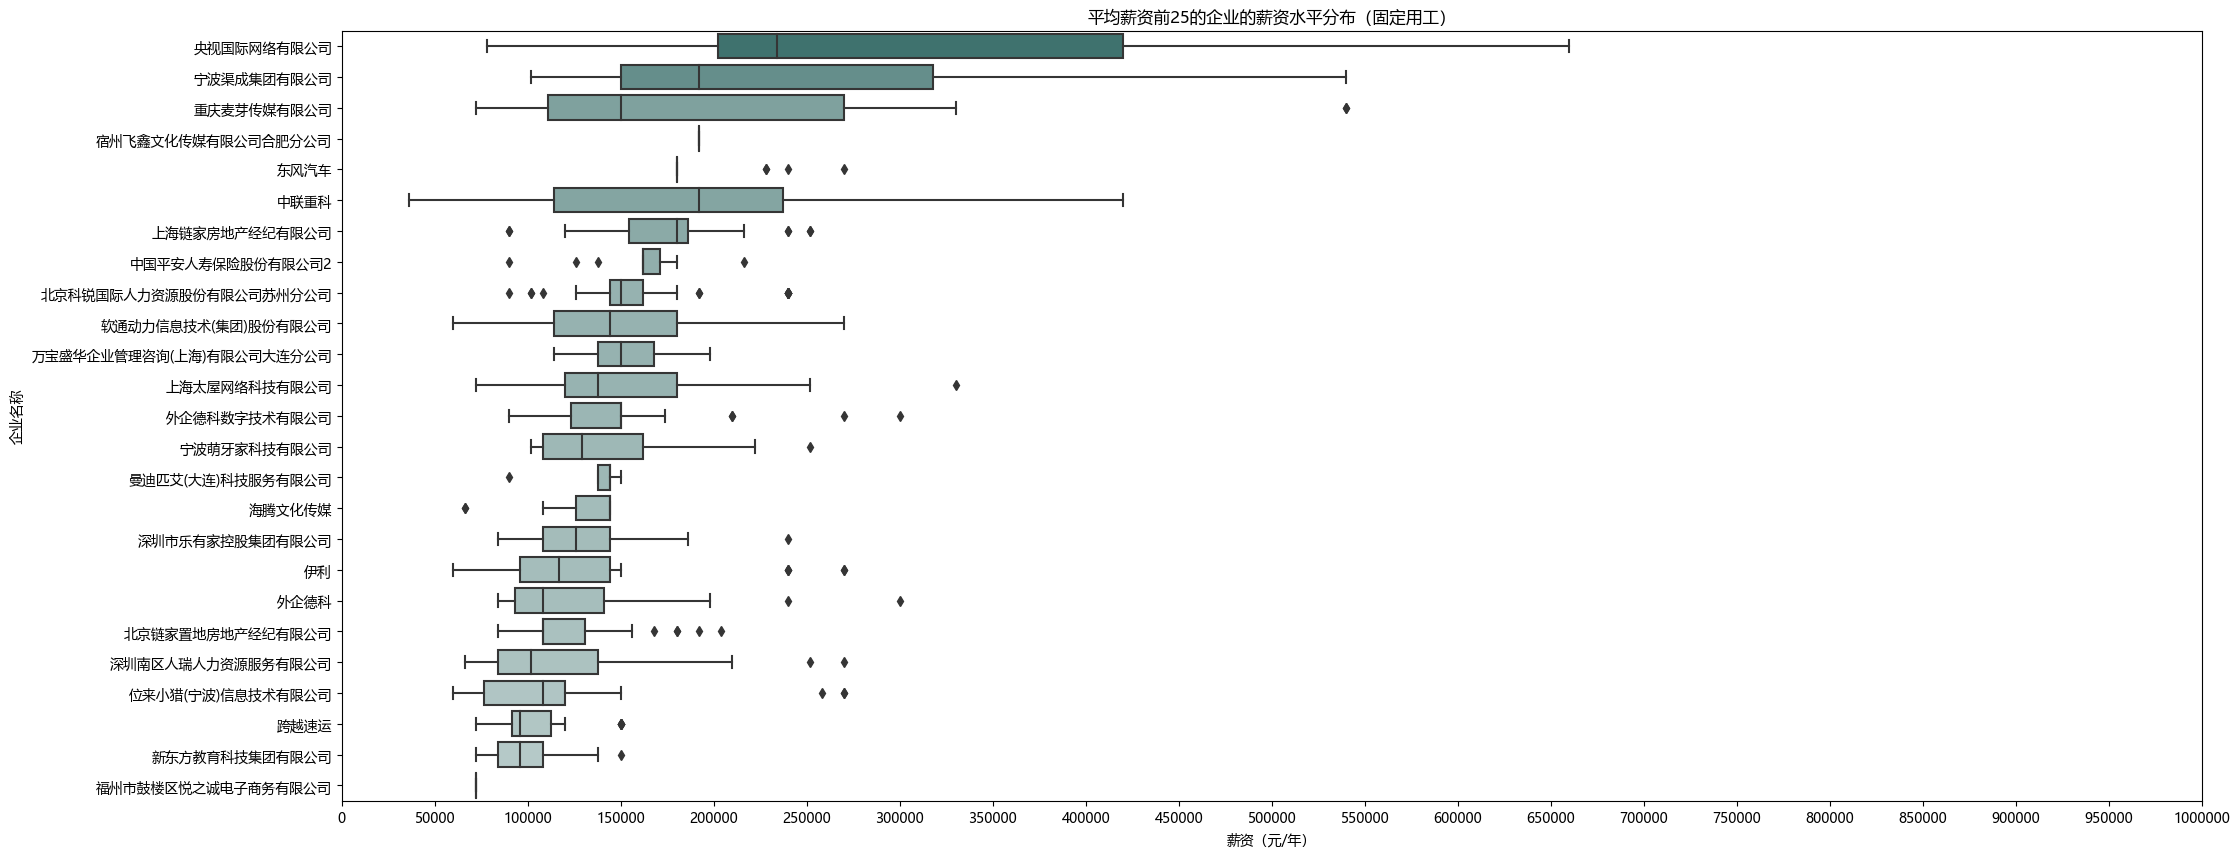

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#377A75", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业名称', x = '平均薪资', data = df_comp_name_fixed, order = comp_name_salary_order_fixed, palette = color_depth)
plt.ylabel("企业名称")
plt.xlabel("薪资（元/年）")
plt.title("平均薪资前25的企业的薪资水平分布（固定用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_name_fixed_top25salaries_path = os.path.join("..\\img\\task2", "平均薪资前25的企业的薪资水平分布（固定用工）.png")
plt.savefig(comp_name_fixed_top25salaries_path, dpi = 300, bbox_inches='tight')

### 灵活用工

In [83]:
df_comp_name_flex = df_names_without_nan[
    (df_names_without_nan['salary_type'] == 'W') | (df_names_without_nan['salary_type'] == 'D') | (df_names_without_nan['salary_type'] == 'H')
    ]

#### 展示招聘信息数量排名前25的企业

In [ ]:
comp_name_count_order_flex = df_comp_name_flex['企业名称'].value_counts().index[: 25]

df_comp_name_flex['企业名称'] = pd.Categorical(df_comp_name_flex['企业名称'], categories = comp_name_count_order_flex, ordered = True)
df_comp_name_flex['平均薪资'] = (df_comp_name_flex['salary_min'] + df_comp_name_flex['salary_max']) / 2
mean_salaries = df_comp_name_flex.groupby('企业名称')['平均薪资'].mean().reindex(comp_name_count_order_flex)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\886328938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_name_flex['企业名称'] = pd.Categorical(df_comp_name_flex['企业名称'], categories = comp_name_count_order_flex, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\886328938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_name_flex['平均薪资'] = (df_comp_name_flex['salary_min'] + df_comp_name_flex['salary_max']) / 2


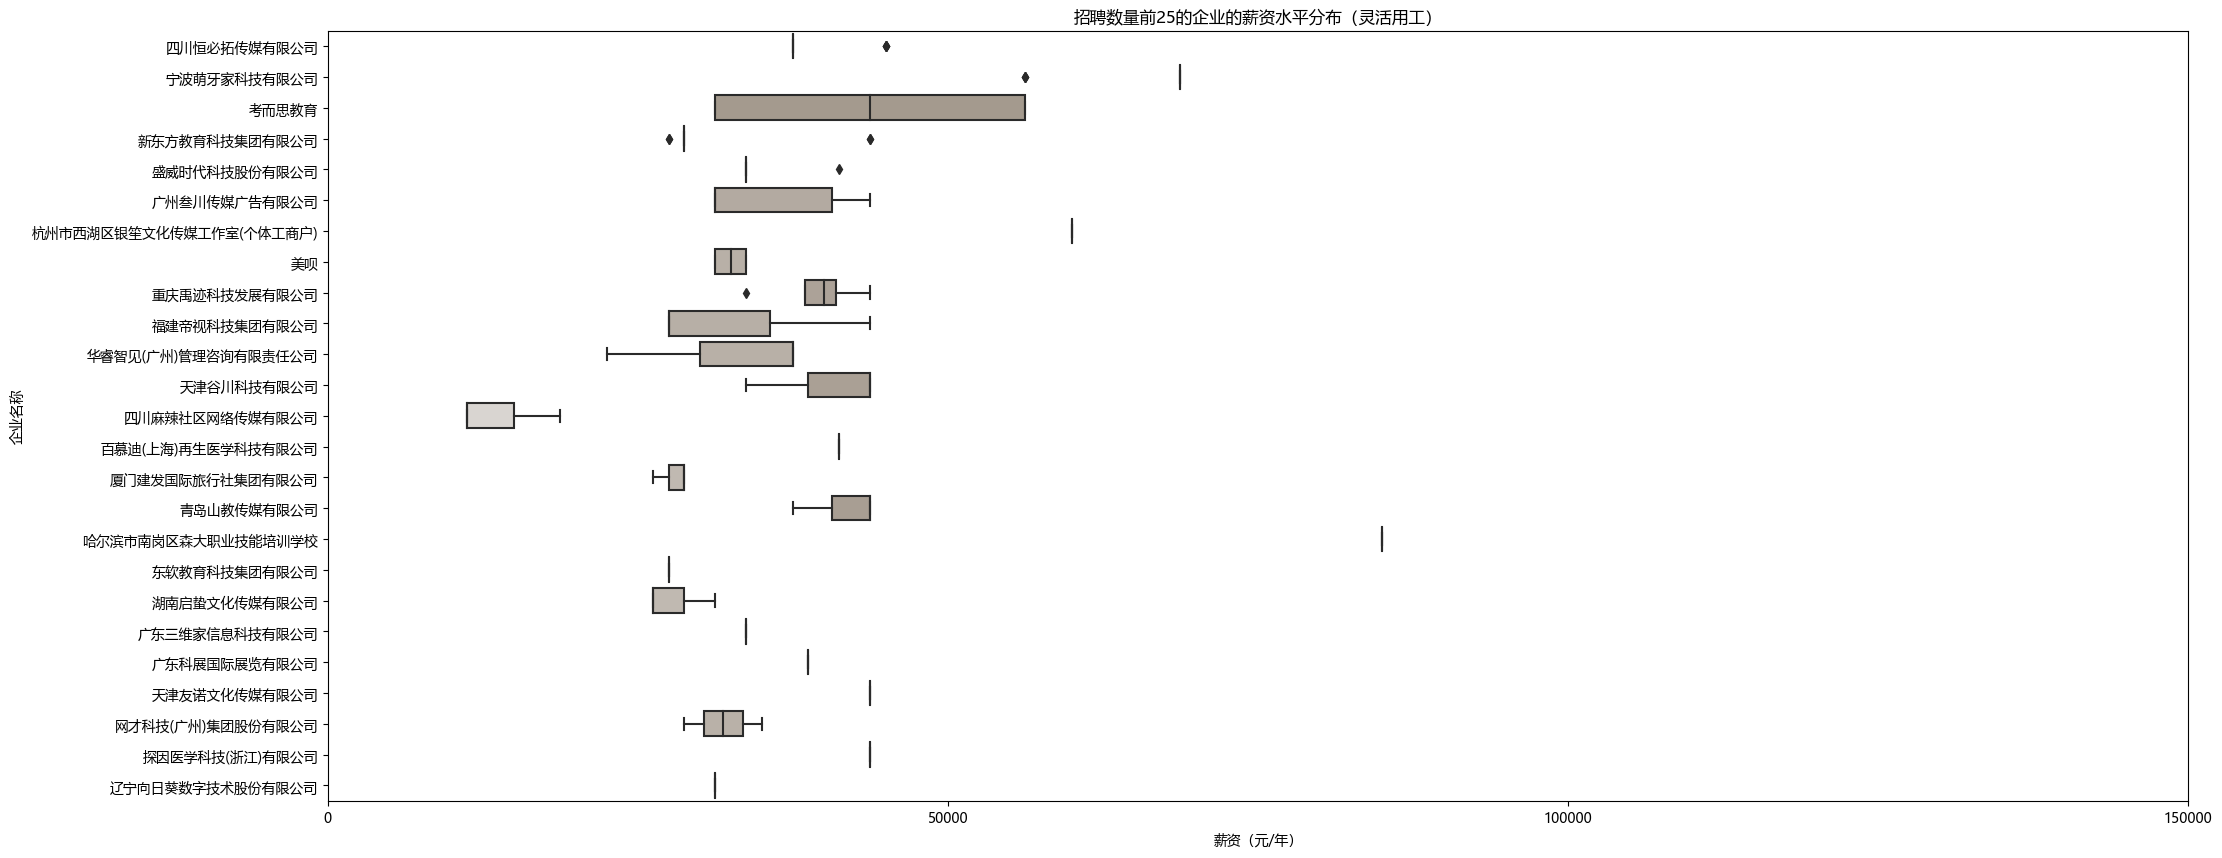

In [ ]:
cmap = sns.light_palette("#62482B", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业名称', x = '平均薪资', data = df_comp_name_flex, order = comp_name_count_order_flex, palette = color_depth)
plt.ylabel("企业名称")
plt.xlabel("薪资（元/年）")
plt.title("招聘数量前25的企业的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_name_flex_top25counts_path = os.path.join("..\\img\\task2", "招聘数量前25的企业的薪资水平分布（灵活用工）.png")
plt.savefig(comp_name_flex_top25counts_path, dpi = 300, bbox_inches='tight')

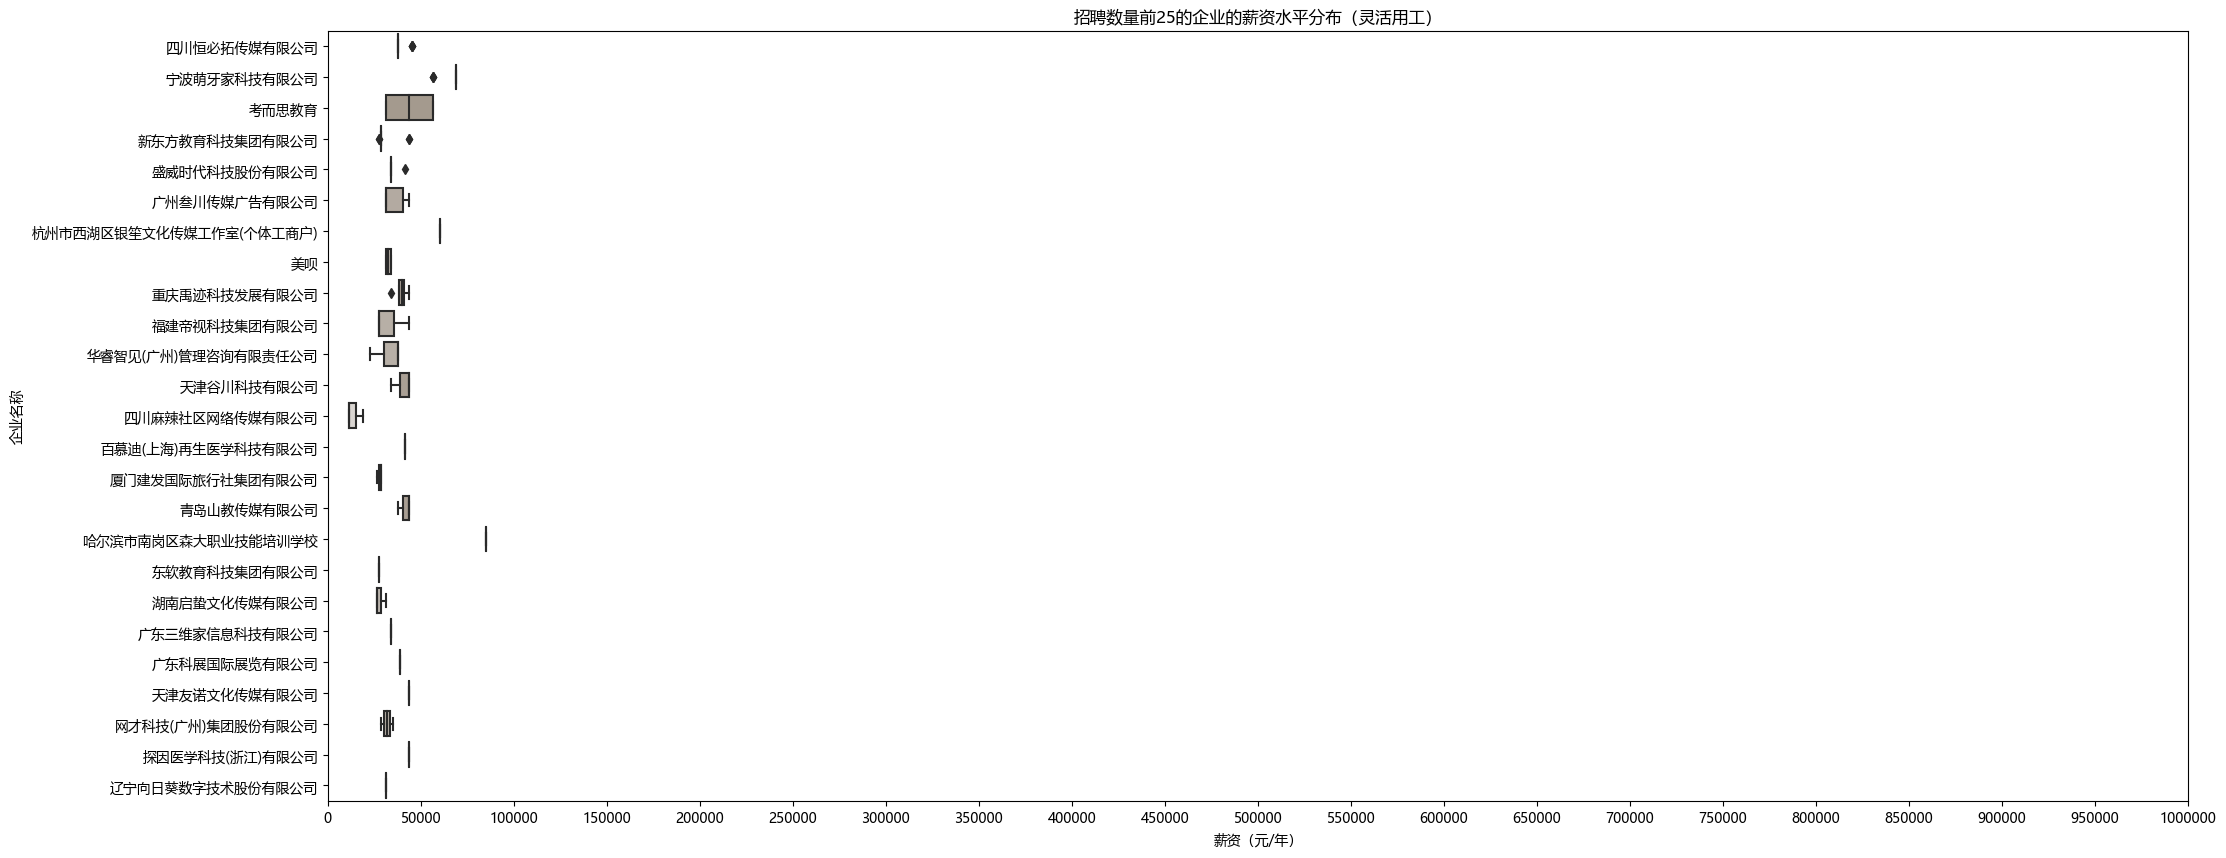

In [ ]:
# 统一x轴范围
plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业名称', x = '平均薪资', data = df_comp_name_flex, order = comp_name_count_order_flex, palette = color_depth)
plt.ylabel("企业名称")
plt.xlabel("薪资（元/年）")
plt.title("招聘数量前25的企业的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_name_flex_top25counts_path_xmax = os.path.join("..\\img\\task2", "招聘数量前25的企业的薪资水平分布（灵活用工）_统一xmax.png")
plt.savefig(comp_name_flex_top25counts_path_xmax, dpi = 300, bbox_inches='tight')

#### 展示平均薪资排名前25的企业

In [91]:
comp_name_salary_order_flex = mean_salaries.sort_values(ascending=False).index[:25]

df_comp_name_flex['企业名称'] = pd.Categorical(df_comp_name_flex['企业名称'], categories=comp_name_salary_order_flex, ordered=True)
mean_salaries = mean_salaries.reindex(comp_name_salary_order_flex)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\354102920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_name_flex['企业名称'] = pd.Categorical(df_comp_name_flex['企业名称'], categories=comp_name_salary_order_flex, ordered=True)


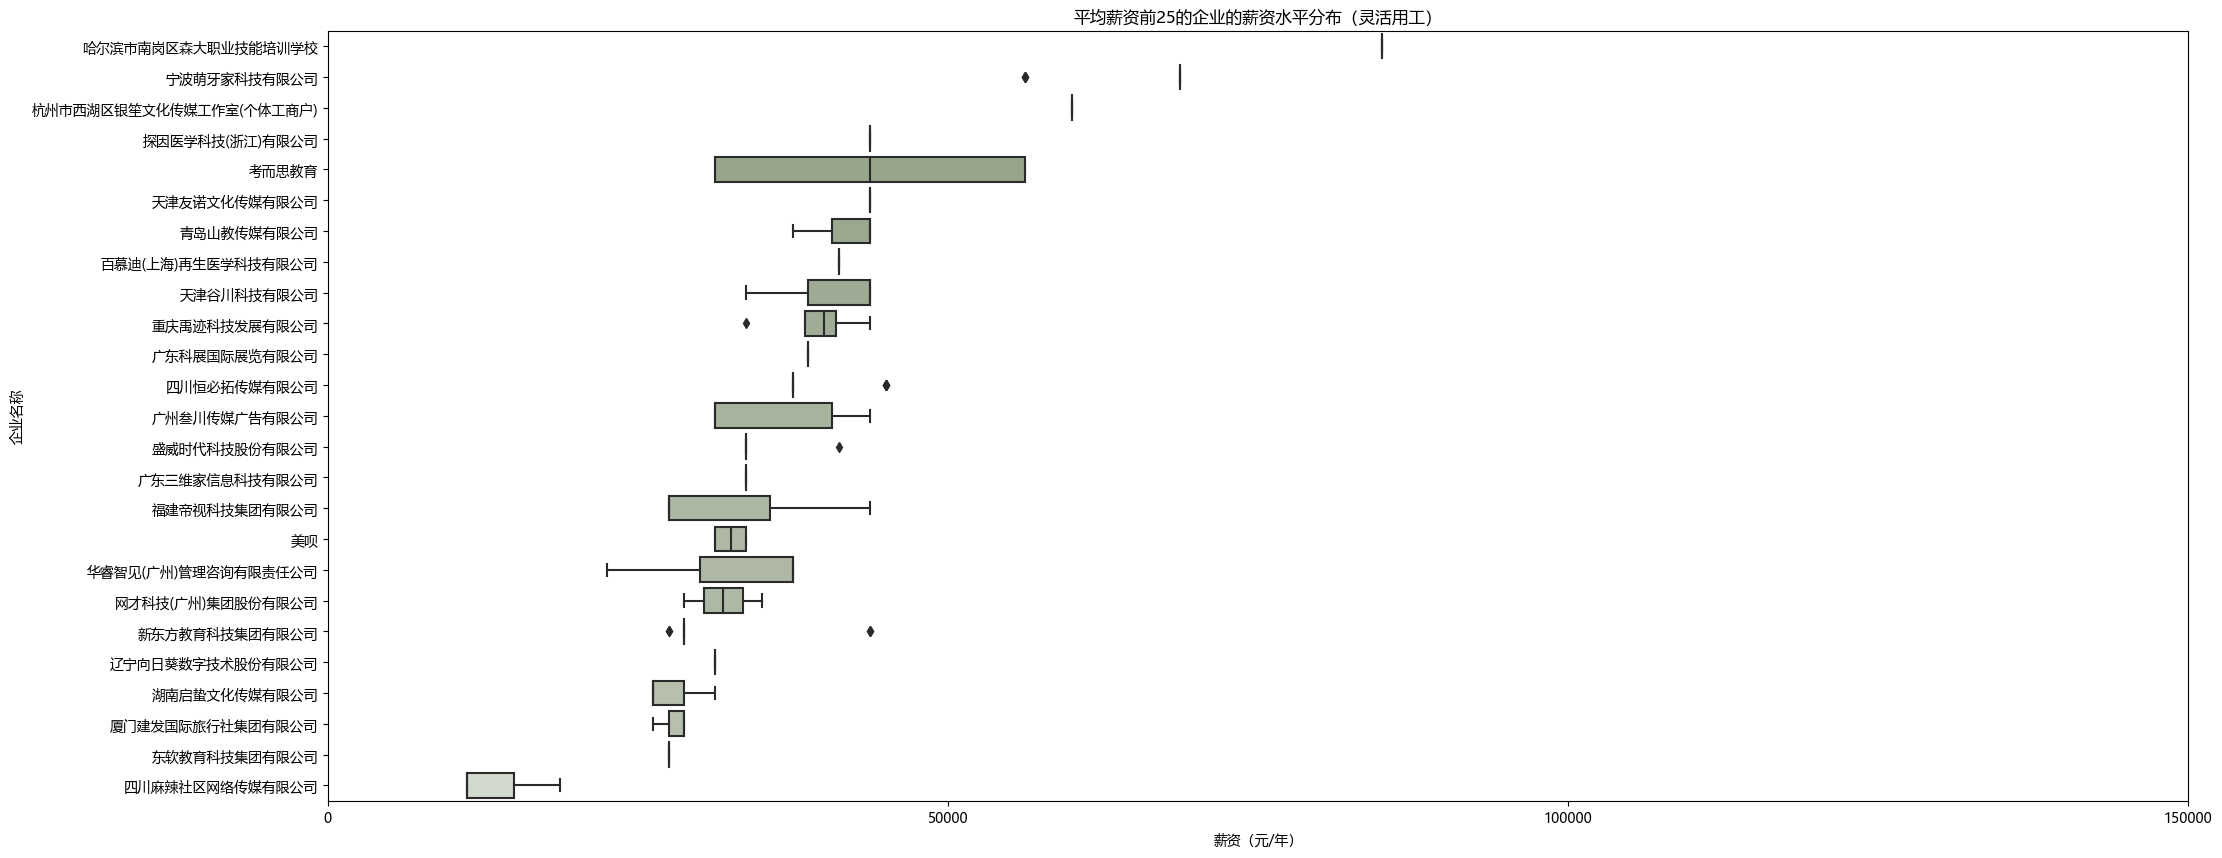

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#46632A", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业名称', x = '平均薪资', data = df_comp_name_flex, order = comp_name_salary_order_flex, palette = color_depth)
plt.ylabel("企业名称")
plt.xlabel("薪资（元/年）")
plt.title("平均薪资前25的企业的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_name_flex_top25salaries_path = os.path.join("..\\img\\task2", "平均薪资前25的企业的薪资水平分布（灵活用工）.png")
plt.savefig(comp_name_flex_top25salaries_path, dpi = 300, bbox_inches='tight')

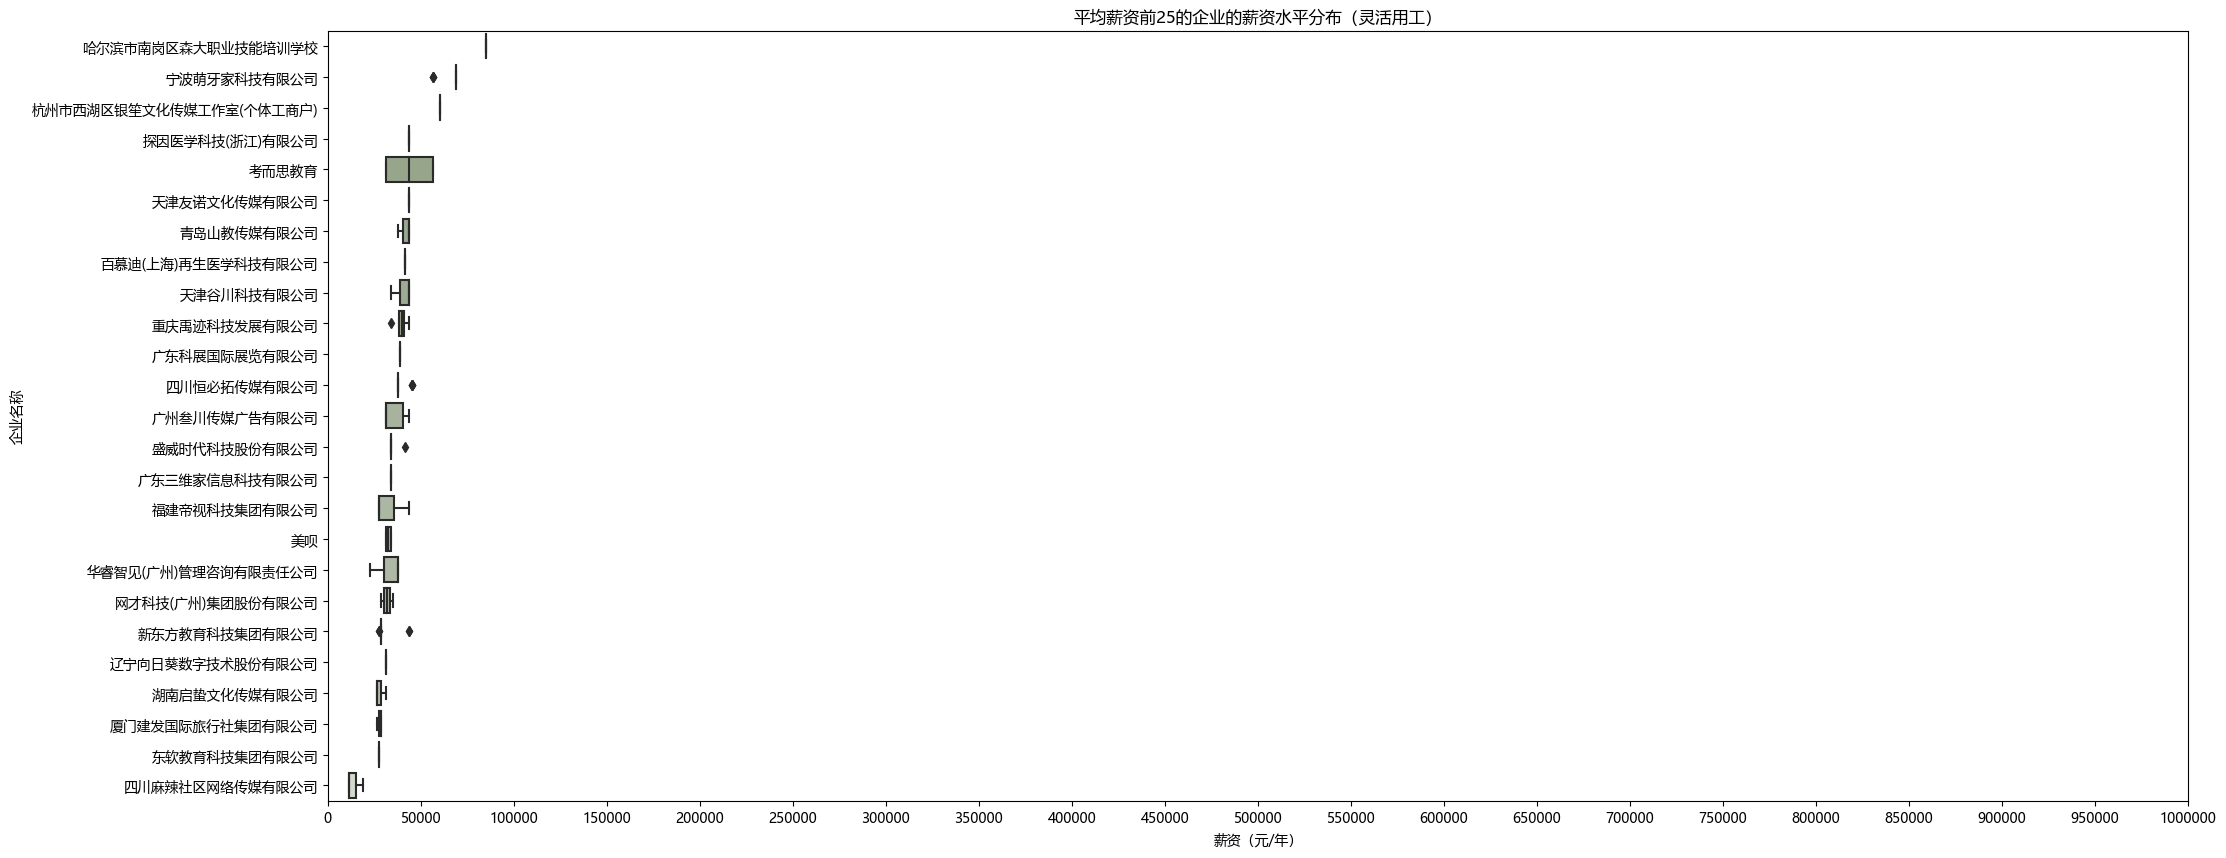

In [ ]:
# 统一x轴范围
plt.figure(figsize = (24, 10))
sns.boxplot(y = '企业名称', x = '平均薪资', data = df_comp_name_flex, order = comp_name_salary_order_flex, palette = color_depth)
plt.ylabel("企业名称")
plt.xlabel("薪资（元/年）")
plt.title("平均薪资前25的企业的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

comp_name_flex_top25salaries_path_xmax = os.path.join("..\\img\\task2", "平均薪资前25的企业的薪资水平分布（灵活用工）_统一xmax.png")
plt.savefig(comp_name_flex_top25salaries_path_xmax, dpi = 300, bbox_inches='tight')

# 岗位类型和薪资的交叉分析

In [121]:
df_jobs_without_nan = df.dropna(subset = ['岗位分类'])

# jobs_without_nan = df_jobs_without_nan['岗位分类'].unique()
# print(jobs_without_nan)

## 固定用工

In [101]:
df_jobs_fixed = df_jobs_without_nan[df_jobs_without_nan['salary_type'] == 'M']

### 展示招聘数量排名前25的岗位类型

In [99]:
jobs_count_order_fixed = df_jobs_fixed['岗位分类'].value_counts().index[: 25] # 此处只取排序前25的做展示

df_jobs_fixed['岗位分类'] = pd.Categorical(df_jobs_fixed['岗位分类'], categories = jobs_count_order_fixed, ordered = True)
df_jobs_fixed['平均薪资'] = (df_jobs_fixed['salary_min'] + df_jobs_fixed['salary_max']) / 2
mean_salaries = df_jobs_fixed.groupby('岗位分类')['平均薪资'].mean().reindex(jobs_count_order_fixed)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\2102448820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_fixed['岗位分类'] = pd.Categorical(df_jobs_fixed['岗位分类'], categories = jobs_count_order_fixed, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\2102448820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_fixed['平均薪资'] = (df_jobs_fixed['salary_min'] + df_jobs_fixed['salary_max']) / 2


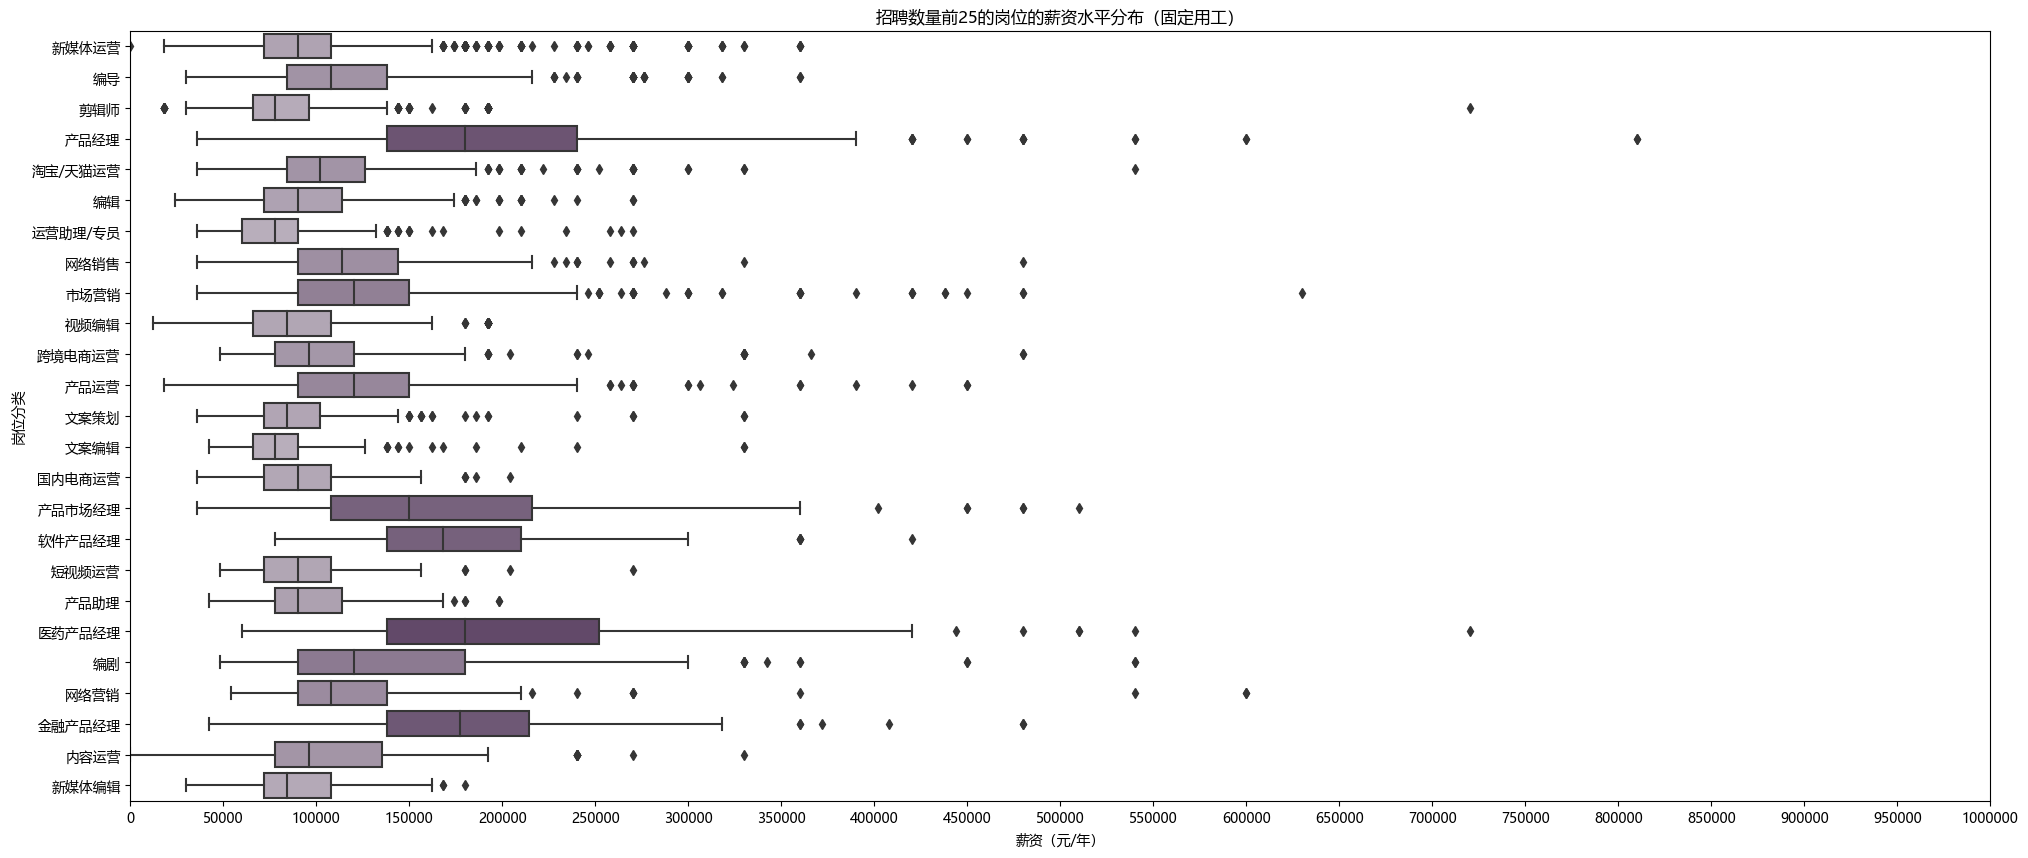

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#65446E", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '岗位分类', x = '平均薪资', data = df_jobs_fixed, order = jobs_count_order_fixed, palette = color_depth)
plt.ylabel("岗位分类")
plt.xlabel("薪资（元/年）")
plt.title("招聘数量前25的岗位的薪资水平分布（固定用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

jobs_fixed_top25counts_path = os.path.join("..\\img\\task2", "招聘数量前25的岗位的薪资水平分布（固定用工）.png")
plt.savefig(jobs_fixed_top25counts_path, dpi = 300, bbox_inches='tight')

### 展示平均薪资排名前25的岗位类型

In [102]:
job_salary_order_fixed = mean_salaries.sort_values(ascending=False).index[:25]

df_jobs_fixed['企业名称'] = pd.Categorical(df_jobs_fixed['企业名称'], categories=job_salary_order_fixed, ordered=True)
mean_salaries = mean_salaries.reindex(job_salary_order_fixed)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\1704933628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_fixed['企业名称'] = pd.Categorical(df_jobs_fixed['企业名称'], categories=job_salary_order_fixed, ordered=True)


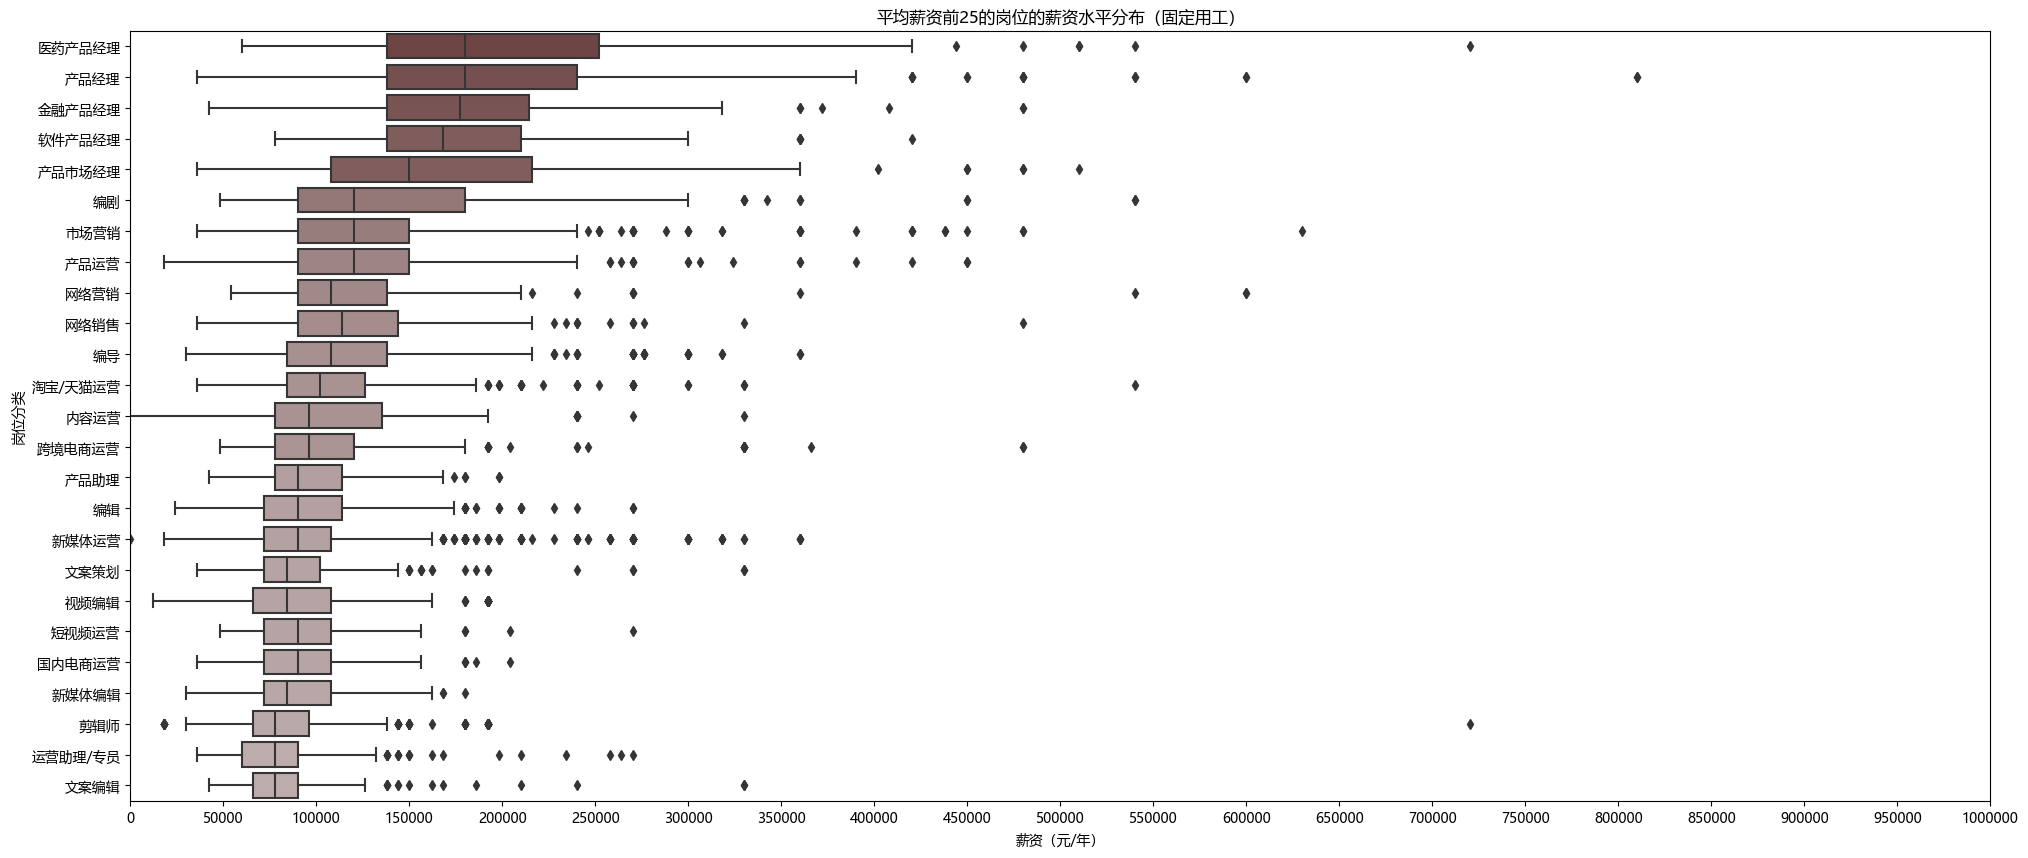

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#743E3E", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '岗位分类', x = '平均薪资', data = df_jobs_fixed, order = job_salary_order_fixed, palette = color_depth)
plt.ylabel("岗位分类")
plt.xlabel("薪资（元/年）")
plt.title("平均薪资前25的岗位的薪资水平分布（固定用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

jobs_fixed_top25salaries_path = os.path.join("..\\img\\task2", "平均薪资前25的岗位的薪资水平分布（固定用工）.png")
plt.savefig(jobs_fixed_top25salaries_path, dpi = 300, bbox_inches='tight')

## 灵活用工

In [122]:
df_jobs_flex = df_jobs_without_nan[
    (df_jobs_without_nan['salary_type'] == 'W') | (df_jobs_without_nan['salary_type'] == 'D') |  (df_jobs_without_nan['salary_type'] == 'H')
    ]

### 展示招聘数量排名前25的岗位类型

In [143]:
jobs_count_order_flex = df_jobs_flex['岗位分类'].value_counts().index[: 25]

df_jobs_flex['岗位分类'] = pd.Categorical(df_jobs_flex['岗位分类'], categories = jobs_count_order_flex, ordered = True)
df_jobs_flex['平均薪资'] = (df_jobs_flex['salary_min'] + df_jobs_flex['salary_max']) / 2
mean_salaries = df_jobs_flex.groupby('岗位分类')['平均薪资'].mean().reindex(jobs_count_order_flex)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3667683924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_flex['岗位分类'] = pd.Categorical(df_jobs_flex['岗位分类'], categories = jobs_count_order_flex, ordered = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\3667683924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_flex['平均薪资'] = (df_jobs_flex['salary_min'] + df_jobs_flex['salary_max']) / 2


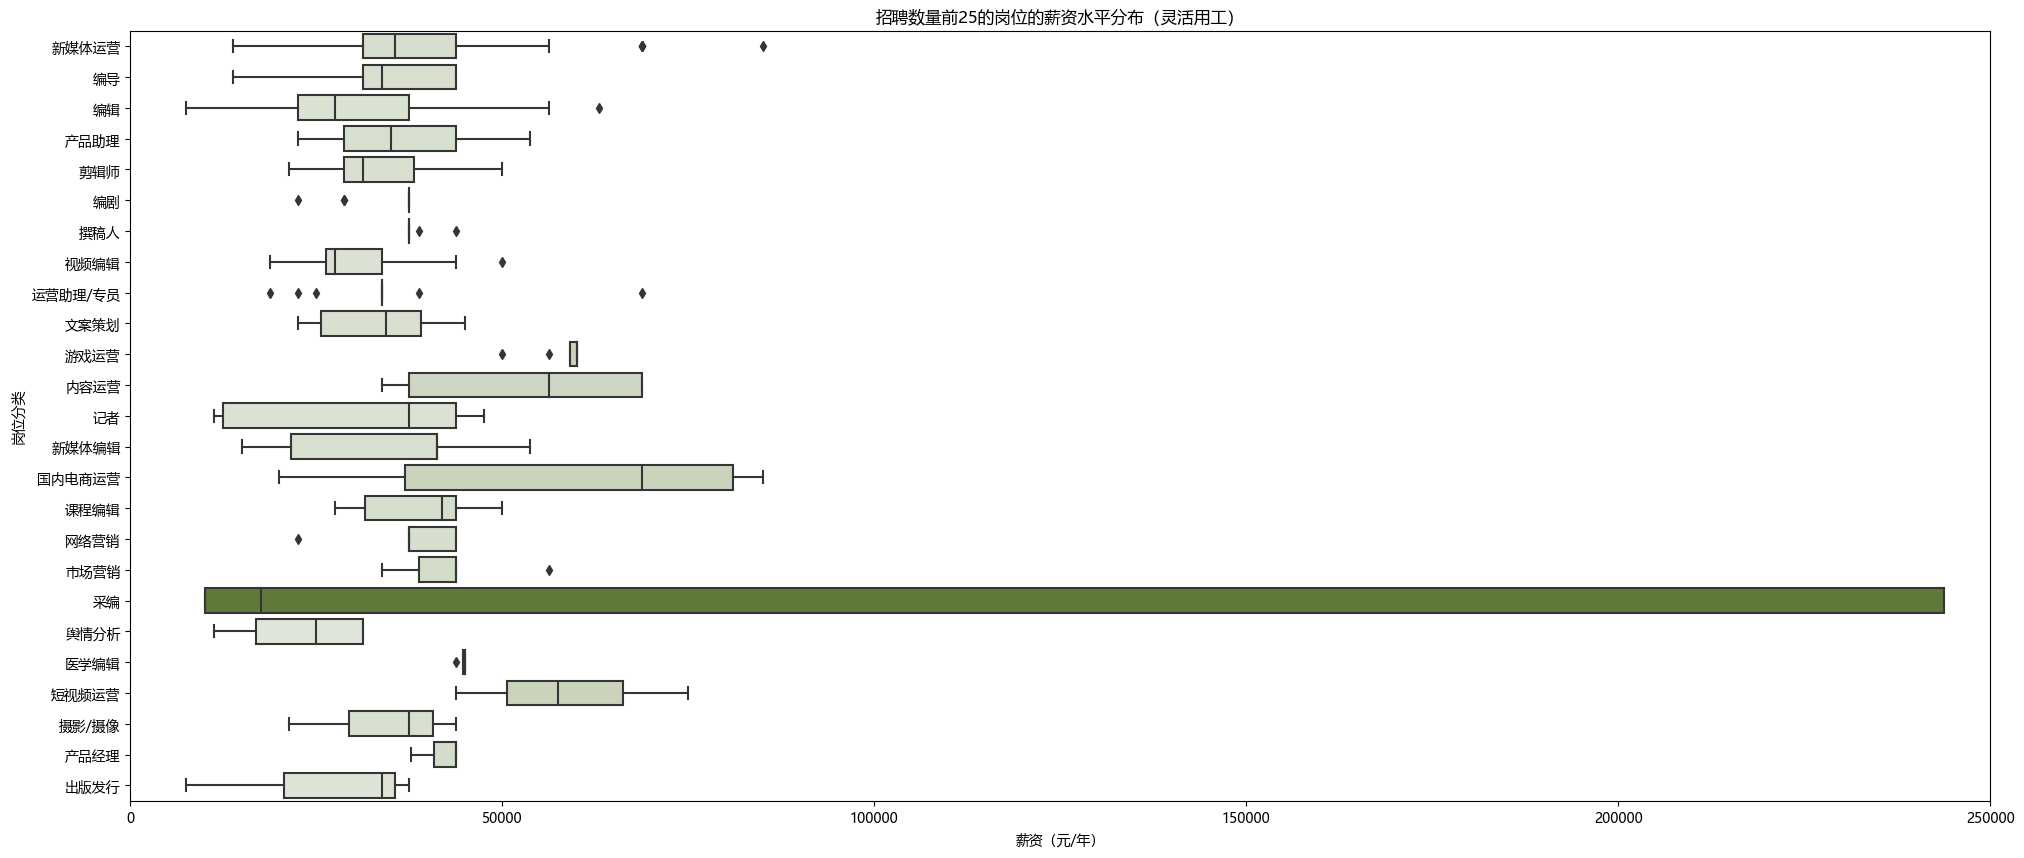

In [ ]:
color_map = sns.light_palette("#60842E", as_cmap=True)
color_depth = [color_map(salary / mean_salaries.max()) for salary in mean_salaries]

plt.figure(figsize = (24, 10))
sns.boxplot(y = '岗位分类', x = '平均薪资', data = df_jobs_flex, order = jobs_count_order_flex, palette = color_depth)
plt.ylabel("岗位分类")
plt.xlabel("薪资（元/年）")
plt.title("招聘数量前25的岗位的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 250000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

jobs_flex_top25counts_path = os.path.join("..\\img\\task2", "招聘数量前25的岗位的薪资水平分布（灵活用工）.png")
plt.savefig(jobs_flex_top25counts_path, dpi = 300, bbox_inches='tight')

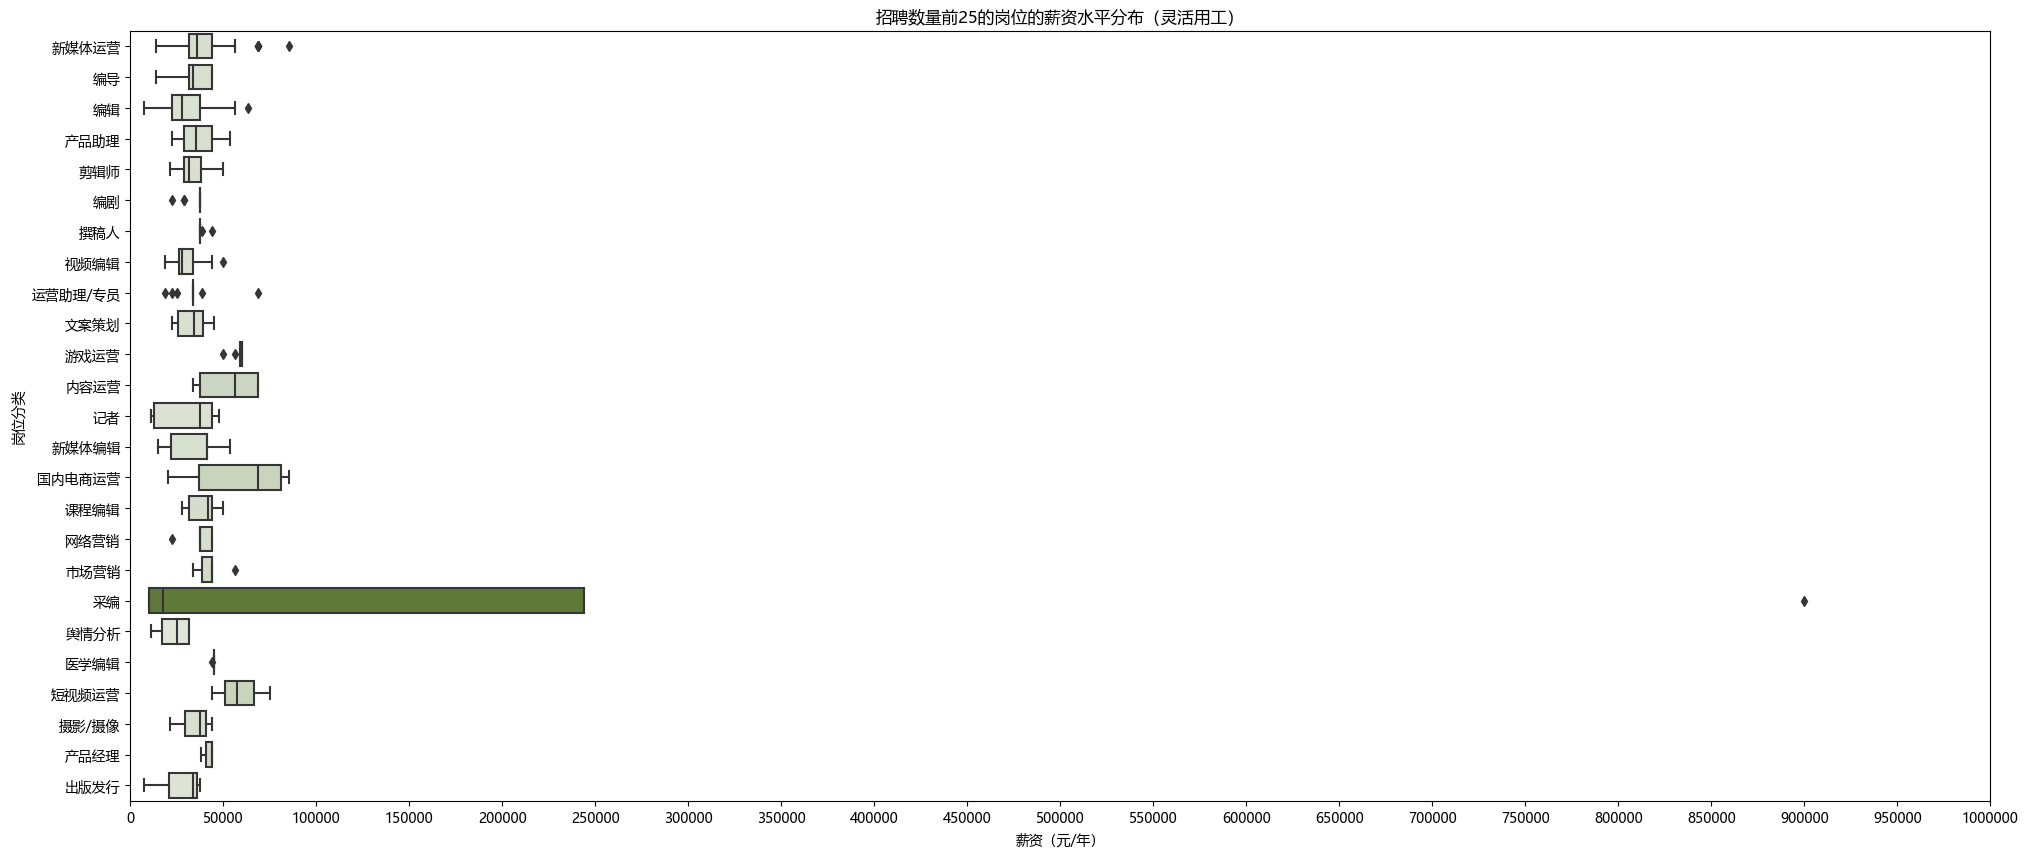

In [ ]:
# 统一x轴范围
plt.figure(figsize = (24, 10))
sns.boxplot(y = '岗位分类', x = '平均薪资', data = df_jobs_flex, order = jobs_count_order_flex, palette = color_depth)
plt.ylabel("岗位分类")
plt.xlabel("薪资（元/年）")
plt.title("招聘数量前25的岗位的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

jobs_flex_top25counts_path_xmax = os.path.join("..\\img\\task2", "招聘数量前25的岗位的薪资水平分布（灵活用工）_统一xmax.png")
plt.savefig(jobs_flex_top25counts_path_xmax, dpi = 300, bbox_inches='tight')

### 展示平均薪资排名前25的岗位类型

In [147]:
jobs_salary_order_flex = mean_salaries.sort_values(ascending=False).index[:25]

df_jobs_flex['岗位分类'] = pd.Categorical(df_jobs_flex['岗位分类'], categories=jobs_salary_order_flex, ordered=True)
mean_salaries = mean_salaries.reindex(jobs_salary_order_flex)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44932\2438578183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_flex['岗位分类'] = pd.Categorical(df_jobs_flex['岗位分类'], categories=jobs_salary_order_flex, ordered=True)


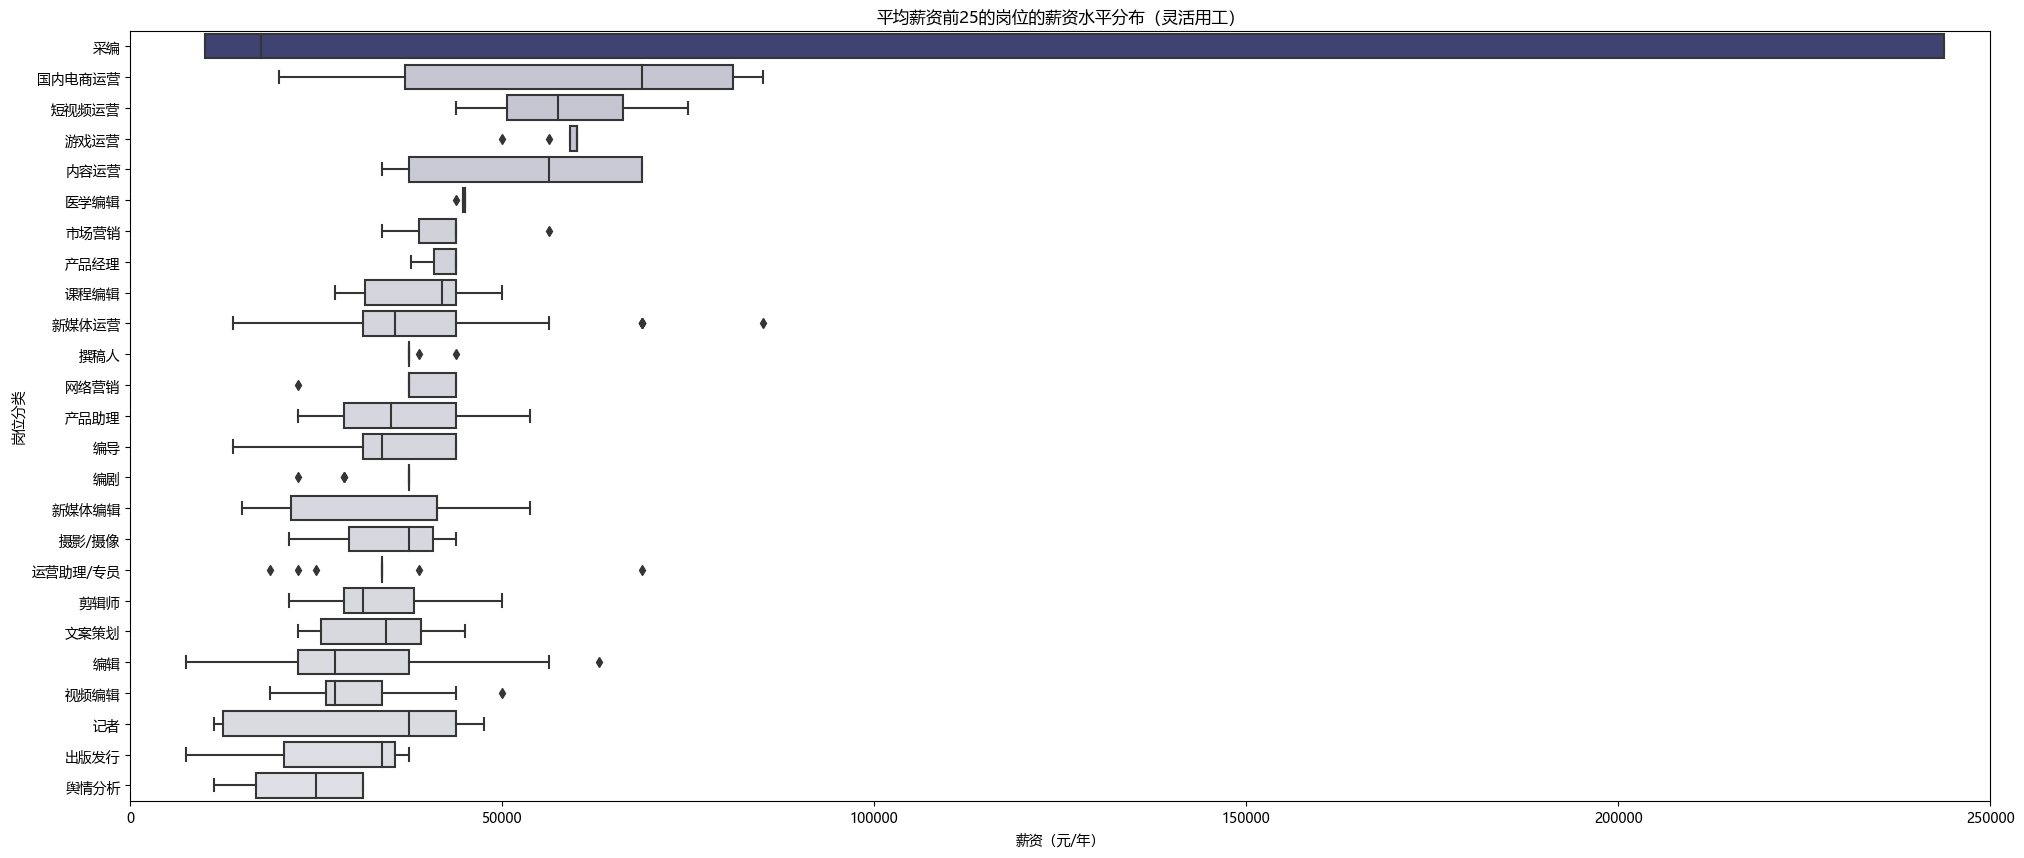

In [ ]:
# 绘制箱型图
cmap = sns.light_palette("#383C7A", as_cmap=True) 
color_depth = mean_salaries.apply(lambda x: cmap(x / mean_salaries.max())).tolist() 

plt.figure(figsize = (24, 10))
sns.boxplot(y = '岗位分类', x = '平均薪资', data = df_jobs_flex, order = jobs_salary_order_flex, palette = color_depth)
plt.ylabel("岗位分类")
plt.xlabel("薪资（元/年）")
plt.title("平均薪资前25的岗位的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 250000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

jobs_flex_top25salaries_path = os.path.join("..\\img\\task2", "平均薪资前25的岗位的薪资水平分布（灵活用工）.png")
plt.savefig(jobs_flex_top25salaries_path, dpi = 300, bbox_inches='tight')

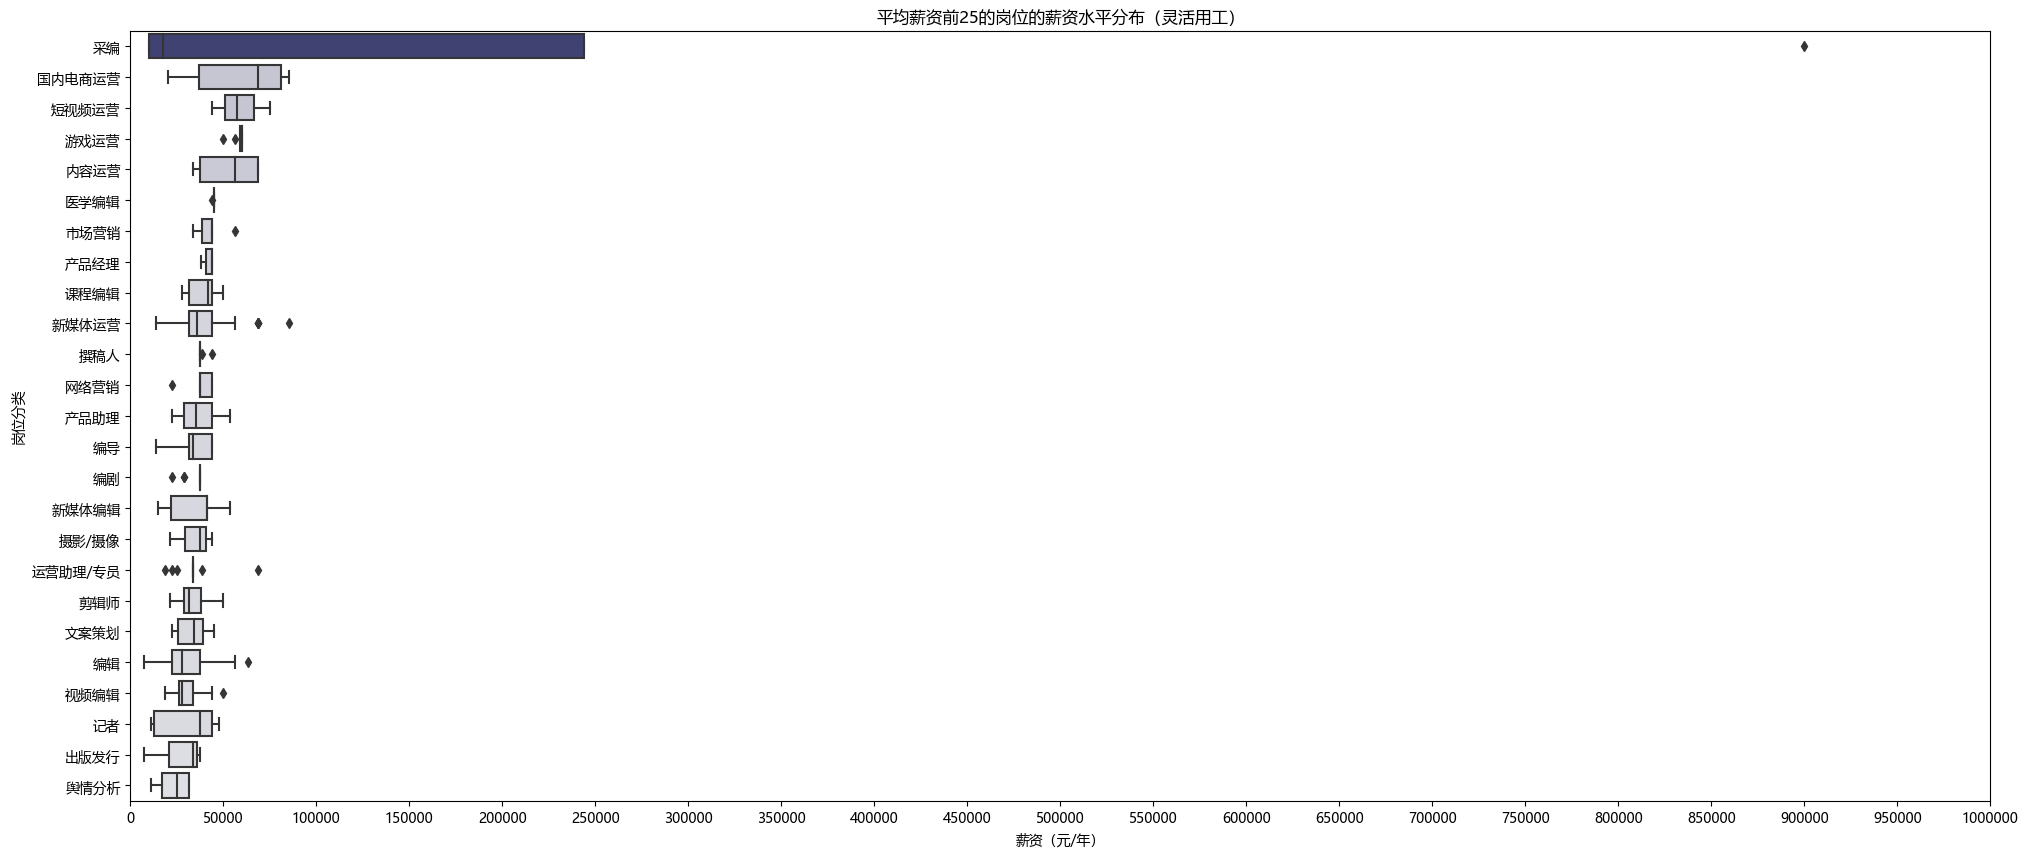

In [ ]:
# 统一x轴范围
plt.figure(figsize = (24, 10))
sns.boxplot(y = '岗位分类', x = '平均薪资', data = df_jobs_flex, order = jobs_salary_order_flex, palette = color_depth)
plt.ylabel("岗位分类")
plt.xlabel("薪资（元/年）")
plt.title("平均薪资前25的岗位的薪资水平分布（灵活用工）")

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.xlim(0, 1000000)
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

jobs_flex_top25salaries_path_xmax = os.path.join("..\\img\\task2", "平均薪资前25的岗位的薪资水平分布（灵活用工）_统一xmax.png")
plt.savefig(jobs_flex_top25salaries_path_xmax, dpi = 300, bbox_inches='tight')